In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [96]:
 df=pd.read_csv('/content/drive/MyDrive/Kaggle Competition/train.csv')

In [99]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [100]:
df.shape

(1460, 81)

In [101]:
numcol=[]
numcol=list(df1.select_dtypes(exclude=['object']))

In [102]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [103]:
null=pd.DataFrame(df.isnull().sum())
null.head(81)

0
Id               0
MSSubClass       0
MSZoning         0
LotFrontage    259
LotArea          0
...            ...
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0

[81 rows x 1 columns]

In [104]:
#Columns with >=30%  missing values
dim=df.shape
thirtyper=dim[0]/3
delcolumns=[]
for i in df.columns:
  if(df[i].isnull().sum()>=thirtyper):
    delcolumns.append(i)

In [105]:
delcolumns

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [106]:
df.drop('MiscFeature',axis=1,inplace=True)

In [107]:
df.drop('Id',axis=1,inplace=True)

In [108]:
df['BsmtQual'].fillna(value='NoB',inplace=True)
df['BsmtCond'].fillna(value='NoB',inplace=True)
df['BsmtExposure'].fillna(value='NoB',inplace=True)
df['BsmtFinType1'].fillna(value='NoB',inplace=True)
df['BsmtFinType2'].fillna(value='NoB',inplace=True)
df['GarageType'].fillna(value='NoG',inplace=True)
df['GarageYrBlt'].fillna(value='NoG',inplace=True)
df['GarageFinish'].fillna(value='NoG',inplace=True)
df['GarageQual'].fillna(value='NoG',inplace=True)
df['GarageCond'].fillna(value='NoG',inplace=True)
df['PoolQC'].fillna(value='NoP',inplace=True)
df['Fence'].fillna(value='NoF',inplace=True)
df['Alley'].fillna(value='NoA',inplace=True)
df['FireplaceQu'].fillna(value='NoFI',inplace=True)
df['LotFrontage'].fillna(value=stats.median('LotFrontage'),inplace=True)
df['MasVnrArea'].fillna(value=167.5,inplace=True)     #167.5 is a median 
df['Electrical'].fillna(value='SBrkr',inplace=True)   # sbrkr is mode
df['MasVnrType'].fillna(value='None',inplace=True)    #none is mode  

In [109]:
null=pd.DataFrame(df.isnull().sum())
null.head(81)

0
MSSubClass     0
MSZoning       0
LotFrontage    0
LotArea        0
Street         0
...           ..
MoSold         0
YrSold         0
SaleType       0
SaleCondition  0
SalePrice      0

[79 rows x 1 columns]

In [110]:
str=df.select_dtypes('object').columns
for i in str:
  print(i)
  print(df[i].unique())

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']
LotFrontage
[65.0 80.0 68.0 60.0 84.0 85.0 75.0 'n' 51.0 50.0 70.0 91.0 72.0 66.0
 101.0 57.0 44.0 110.0 98.0 47.0 108.0 112.0 74.0 115.0 61.0 48.0 33.0
 52.0 100.0 24.0 89.0 63.0 76.0 81.0 95.0 69.0 21.0 32.0 78.0 121.0 122.0
 40.0 105.0 73.0 77.0 64.0 94.0 34.0 90.0 55.0 88.0 82.0 71.0 120.0 107.0
 92.0 134.0 62.0 86.0 141.0 97.0 54.0 41.0 79.0 174.0 99.0 67.0 83.0 43.0
 103.0 93.0 30.0 129.0 140.0 35.0 37.0 118.0 87.0 116.0 150.0 111.0 49.0
 96.0 59.0 36.0 56.0 102.0 58.0 38.0 109.0 130.0 53.0 137.0 45.0 106.0
 104.0 42.0 39.0 144.0 114.0 128.0 149.0 313.0 168.0 182.0 138.0 160.0
 152.0 124.0 153.0 46.0]
Street
['Pave' 'Grvl']
Alley
['NoA' 'Grvl' 'Pave']
LotShape
['Reg' 'IR1' 'IR2' 'IR3']
LandContour
['Lvl' 'Bnk' 'Low' 'HLS']
Utilities
['AllPub' 'NoSeWa']
LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope
['Gtl' 'Mod' 'Sev']
Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Saw

In [111]:
# Ordinal encoding

maps1={'GLQ': 7, 'ALQ': 6, 'Unf': 2, 'Rec': 4, 'BLQ': 5, 'NoB': 1, 'LwQ': 3}
df['BsmtFinType1']=df['BsmtFinType1'].map(maps1)
maps2={'GLQ': 7, 'ALQ': 6, 'Unf': 2, 'Rec': 4, 'BLQ': 5, 'NoB': 1, 'LwQ': 3}
df['BsmtFinType2']=df['BsmtFinType2'].map(maps2)
maps3={'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1}
df['LotShape']=df['LotShape'].map(maps3)
maps4={'Gd': 5, 'TA': 4, 'Ex': 6, 'Fa': 3,'Po':2,'NoB':1}
df['BsmtQual']=df['BsmtQual'].map(maps4)
df['BsmtCond']=df['BsmtCond'].map(maps4)
maps5={'No': 2, 'Gd': 5, 'Mn': 3, 'Av': 4, 'NoB': 1}
df['BsmtExposure']=df['BsmtExposure'].map(maps5)
maps6={'TA': 3, 'Gd': 4, 'Fa': 2, 'Po': 1, 'Ex': 5}
df['ExterQual']=df['ExterQual'].map(maps6)
df['ExterCond']=df['ExterCond'].map(maps6)
df['HeatingQC']=df['HeatingQC'].map(maps6)
df['KitchenQual']=df['KitchenQual'].map(maps6)
maps7={'Typ': 7, 'Min1': 6, 'Maj1': 3, 'Min2': 5, 'Mod': 4, 'Maj2': 2, 'Sev': 1}
df['Functional']=df['Functional'].map(maps7)
maps8={'Gd': 5, 'TA': 4, 'Ex': 6, 'Fa': 3,'Po':2,'NoFI':1}
df['FireplaceQu']=df['FireplaceQu'].map(maps8)
maps9={'Attchd': 6, 'Detchd': 2, 'BuiltIn': 4, 'CarPort': 3, 'NoG': 1, 'Basment': 5, '2Types': 7}
df['GarageType']=df['GarageType'].map(maps9)
maps10={'RFn': 3, 'Unf': 2, 'Fin': 4, 'NoG': 1}
df['GarageFinish']=df['GarageFinish'].map(maps10)
maps11={'Gd': 5, 'TA': 4, 'Ex': 6, 'Fa': 3,'Po':2,'NoG':1}
df['GarageQual']=df['GarageQual'].map(maps11)
df['GarageCond']=df['GarageCond'].map(maps11)
maps12={'Y': 3, 'N': 1, 'P': 2}
df['PavedDrive']=df['PavedDrive'].map(maps12)
maps13={'Gd': 5, 'TA': 4, 'Ex': 6, 'Fa': 3,'Po':2,'NoP':1}
df['PoolQC']=df['PoolQC'].map(maps13)
maps14={'NoF':1 ,'MnPrv':4 ,'GdWo':3 ,'GdPrv':5, 'MnWw':2}
df['Fence']=df['Fence'].map(maps14)
maps15={'WD': 9, 'New': 7, 'COD': 6, 'ConLD': 2, 'ConLI': 3, 'CWD': 8, 'ConLw': 4, 'Con': 5, 'Oth': 1}
df['SaleType']=df['SaleType'].map(maps15)
maps16={'Normal': 6, 'Abnorml': 5, 'Partial': 1, 'AdjLand': 4, 'Alloca': 3, 'Family':2}
df['SaleCondition']=df['SaleCondition'].map(maps16)
maps17={'NoA':1,'Grvl': 3 ,'Pave': 2}
df['Alley']=df['Alley'].map(maps17)
maps18={'Grvl': 3 ,'Pave': 2}
df['Street']=df['Street'].map(maps18)
maps19={'Gtl': 3, 'Mod': 2, 'Sev': 1}
df['LandSlope']=df['LandSlope'].map(maps19)


In [112]:
df['GarageYrBlt'].replace('NoG',0,inplace=True)
df['LotFrontage'].replace('n',0,inplace=True)
df['GarageYrBlt'].replace('e',0,inplace=True)

In [113]:
# Typecasting the feature to float

df['GarageYrBlt'].apply(lambda x: float(x))
df['LotFrontage'].apply(lambda x: float(x))

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [114]:
labcol=list(df.select_dtypes('object').columns)
labcol

['MSZoning',
 'LandContour',
 'Utilities',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical']

In [115]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
def lab(labcol):
  for i in labcol:
    df[i]=LabelEncoder().fit_transform(df[i])
lab(labcol)


In [116]:
df.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0          60         3         65.0     8450       2      1         4   
1          20         3         80.0     9600       2      1         4   
2          60         3         68.0    11250       2      1         3   
3          70         3         60.0     9550       2      1         3   
4          60         3         84.0    14260       2      1         3   

   LandContour  Utilities  LotConfig  ...  ScreenPorch  PoolArea  PoolQC  \
0            3          0          4  ...            0         0       1   
1            3          0          2  ...            0         0       1   
2            3          0          4  ...            0         0       1   
3            3          0          0  ...            0         0       1   
4            3          0          2  ...            0         0       1   

   Fence  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0      1        0       2    2008         9              6     208500  
1      1        0       5    2007         9              6     181500  
2      1        0       9    2008         9              6     223500  
3      1        0       2    2006         9              5     140000  
4      1        0      12    2008         9              6     250000  

[5 rows x 79 columns]

In [117]:
str=df.select_dtypes('object').columns
str

Index([], dtype='object')

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   Alley          1460 non-null   int64  
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   int64  
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   int64  
 12  Condition1     1460 non-null   int64  
 13  Condition2     1460 non-null   int64  
 14  BldgType       1460 non-null   int64  
 15  HouseStyle     1460 non-null   int64  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [119]:
df.shape

(1460, 79)

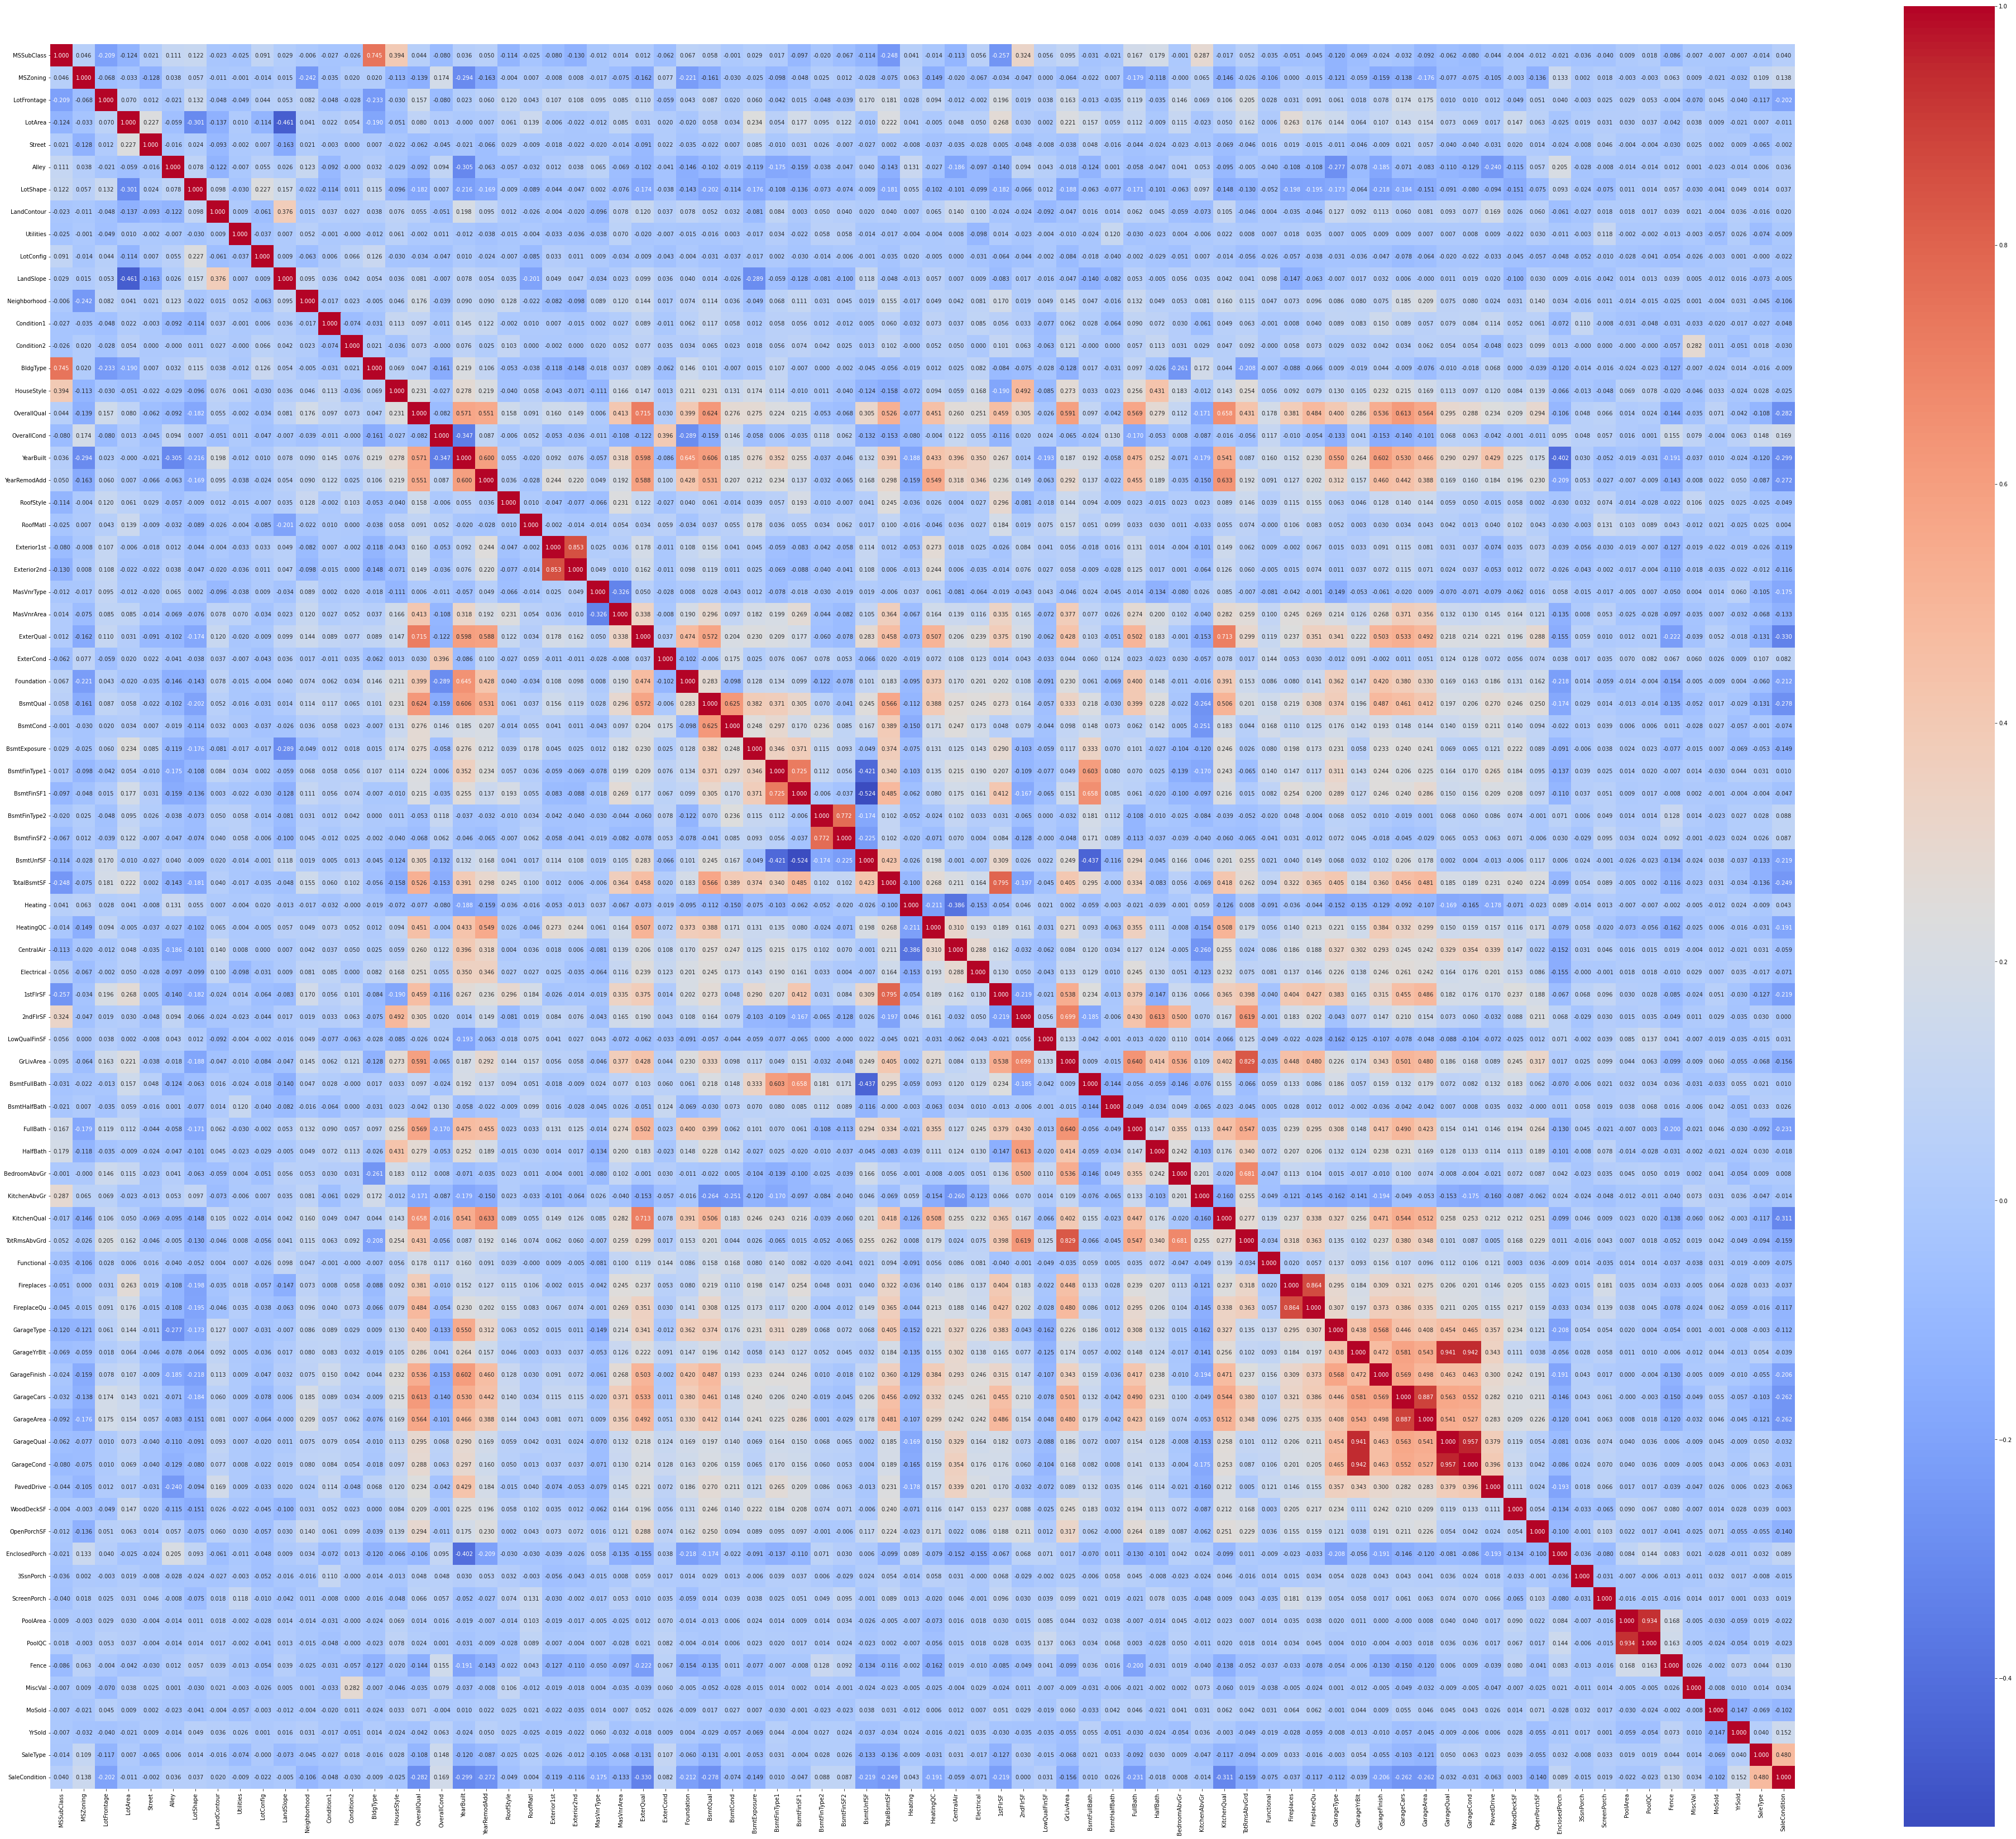

In [41]:
# Feature selection

# Based on correlation
from sklearn.model_selection import train_test_split
X=df.drop('SalePrice',axis=1)
y=df['SalePrice']
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=0)
plt.figure(figsize=(70,60))
sns.heatmap(X_train.corr(method="pearson"),annot=True,square= True,fmt='.3f',cmap= 'coolwarm')



In [120]:
 def cor(d,threshold):
  col_corr=set()
  cmatrix=d.corr(method="pearson")
  for i in range(len(d.columns)):
    for j in range(i):
      if(cmatrix.iloc[i,j]>threshold):
        col=cmatrix.columns[i]
        col_corr.add(col)
  return col_corr  

In [121]:
cor(df,0.90)

{'GarageCond', 'GarageQual', 'PoolQC'}

In [122]:
df.drop(['GarageCond','GarageYrBlt','PoolQC'],axis=1,inplace=True)

In [45]:
from sklearn.feature_selection import VarianceThreshold
vt=VarianceThreshold(threshold=0)
vt.fit(df)

VarianceThreshold(threshold=0)

In [46]:
vt.get_support(indices=False)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [47]:
df.columns[vt.get_support(indices=False)]

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'En

In [48]:
zero_var_col=[i for i in df.columns if i not in df.columns[vt.get_support(indices=False)]]
zero_var_col

[]

In [49]:
df.drop(zero_var_col,axis=1,inplace=True)

In [50]:
# feature importance

from sklearn.model_selection import train_test_split
X=df.drop('SalePrice',axis=1)
y=df['SalePrice']
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=0)
from sklearn.feature_selection import chi2
fscore,p_values=chi2(X_train,Y_train)
print(fscore)
print(p_values)

[1.55977868e+04 9.57947249e+01 1.26832632e+04 9.57424896e+06
 1.98504912e+00 6.99638802e+01 6.50913840e+01 1.07422686e+02
 2.32600000e+02 4.70889806e+02 1.92446587e+01 1.84199822e+03
 1.69005249e+02 4.09920635e+00 1.59414596e+03 6.90798094e+02
 3.00601876e+02 1.30939683e+02 3.69509241e+02 1.56935014e+02
 3.10328697e+02 2.10467811e+02 6.26411263e+02 7.29326037e+02
 1.34790126e+02 2.35624255e+05 8.62518871e+01 2.31529010e+01
 2.66278647e+02 1.39106974e+02 5.27632812e+01 2.98974672e+02
 6.73430191e+02 3.32801142e+05 1.85232003e+02 2.80232023e+05
 2.22636832e+05 1.39054934e+05 3.68863503e+01 1.44716855e+02
 4.50618727e+01 1.97243067e+02 9.91341880e+04 3.80426688e+05
 2.09641215e+05 1.56737393e+05 3.77409207e+02 4.38012599e+02
 1.57332097e+02 4.27080799e+02 1.34640967e+02 2.12982305e+01
 1.06960566e+02 2.96581751e+02 3.35451236e+01 4.77514045e+02
 8.60046065e+02 5.63268983e+02 2.29868869e+02 2.59616691e+02
 7.89879928e+04 8.38346590e+01 5.72800183e+01 1.14428548e+05
 6.79963810e+04 8.611984

In [51]:
p_values_series=pd.Series(p_values)
p_values_series.index=X_train.columns
pd.DataFrame(p_values_series)

0
MSSubClass     0.000000
MSZoning       1.000000
LotFrontage    0.000000
LotArea        0.000000
Street         1.000000
...                 ...
MiscVal        0.000000
MoSold         0.019631
YrSold         1.000000
SaleType       1.000000
SaleCondition  1.000000

[75 rows x 1 columns]

In [52]:
df.shape

(1460, 76)

In [53]:
print(numcol)


['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'Fence', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']


In [138]:
df.drop(['LowQualFinSF','EnclosedPorch','ScreenPorch','3SsnPorch','PoolArea','MiscVal'],axis=1,inplace=True)

# dropping all these features because after the applying the transformation the values become equal making variance of the feature 0

In [123]:
numcol.remove('Unnamed: 0')

MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageCars
GarageArea
MoSold
YrSold
SalePrice


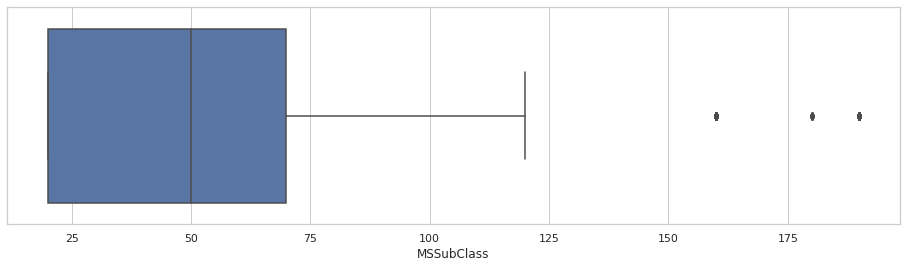

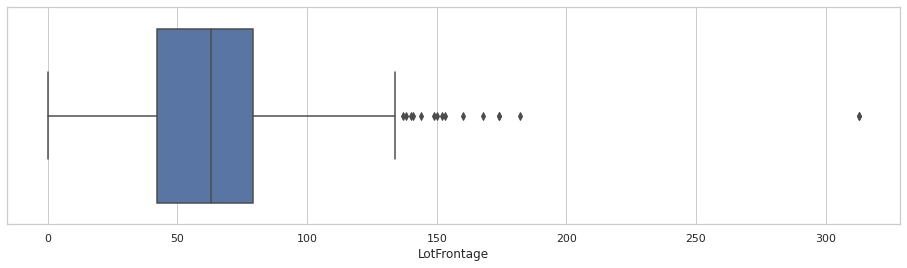

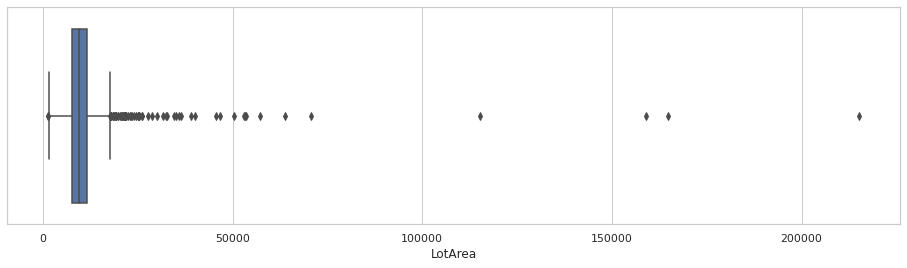

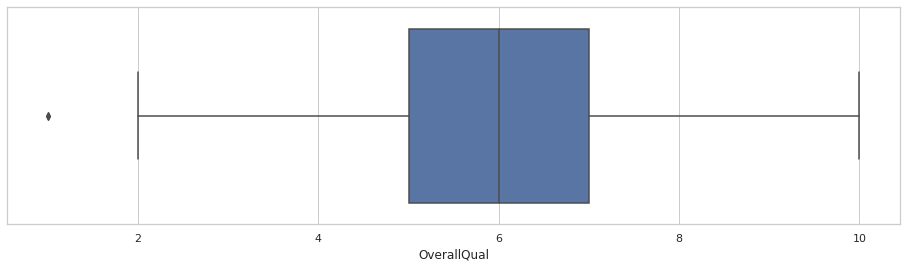

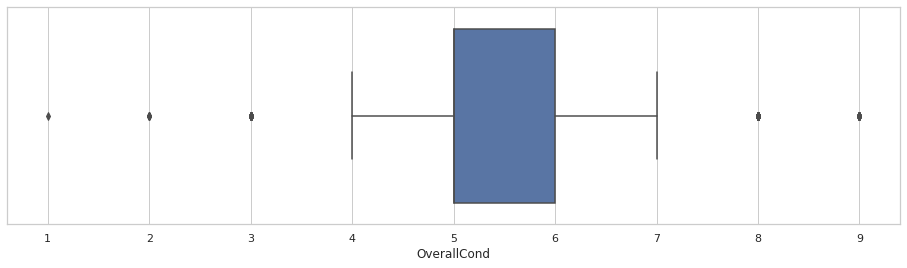

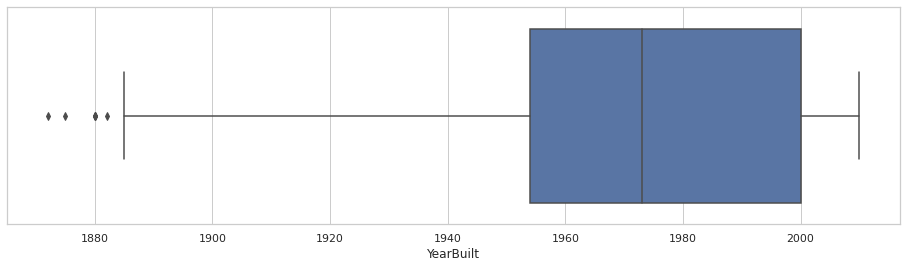

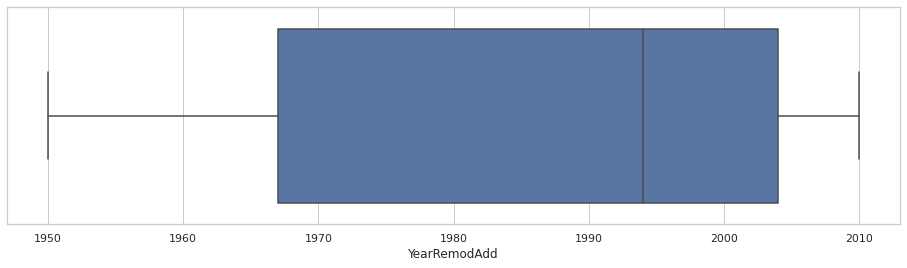

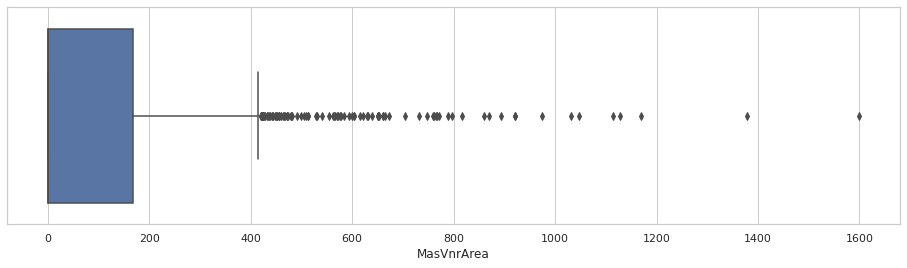

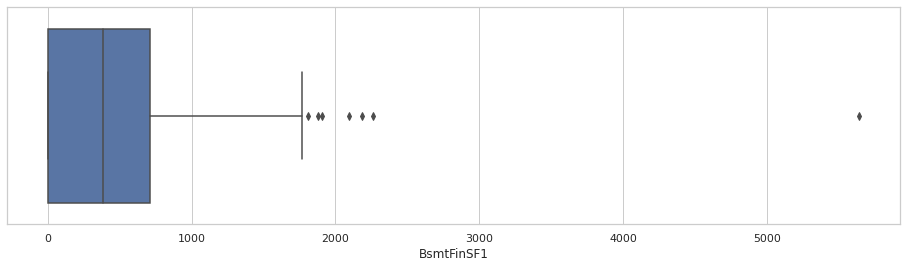

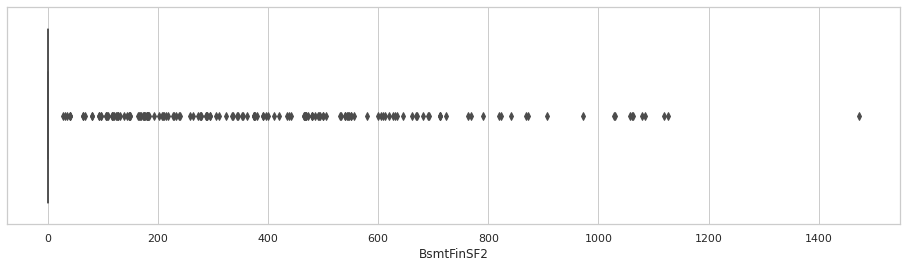

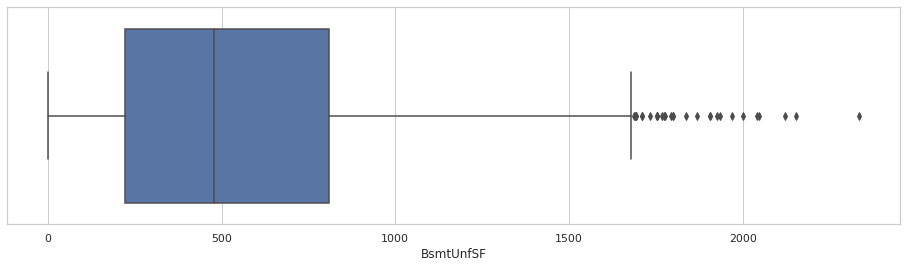

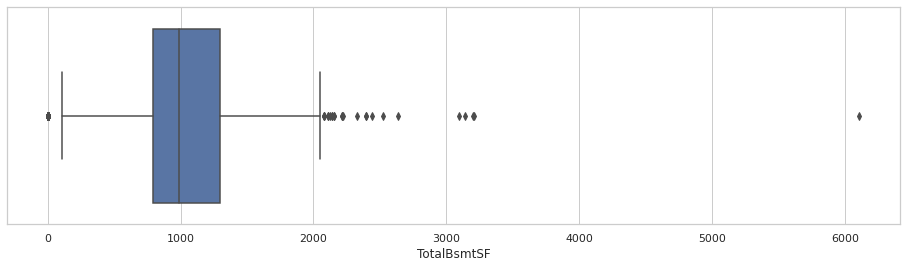

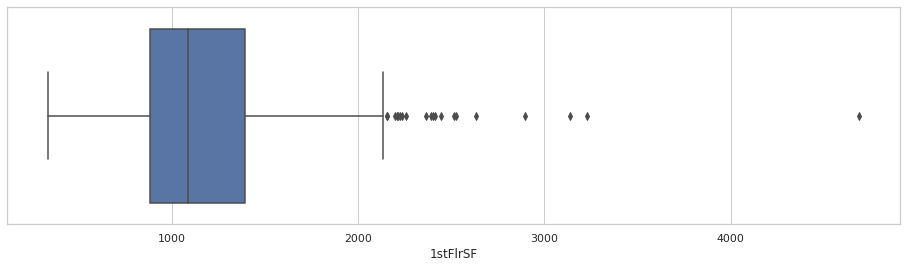

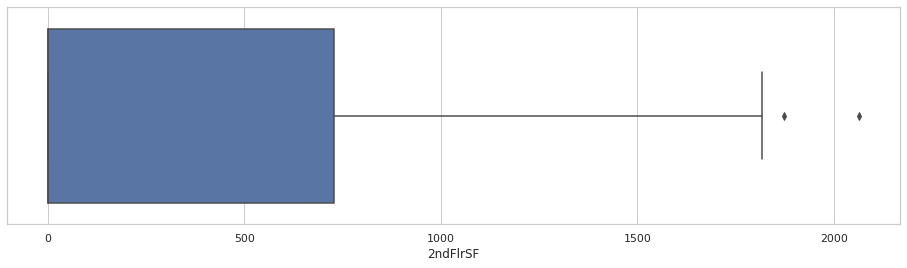

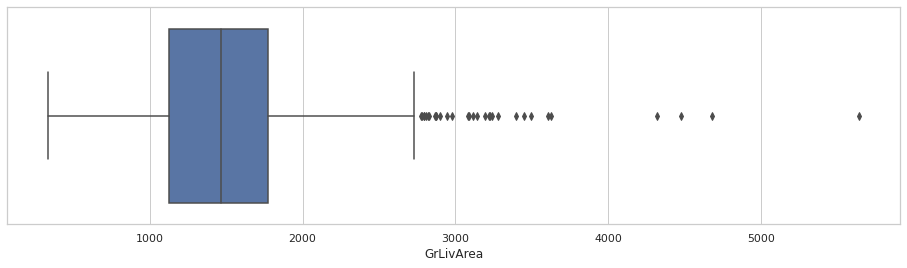

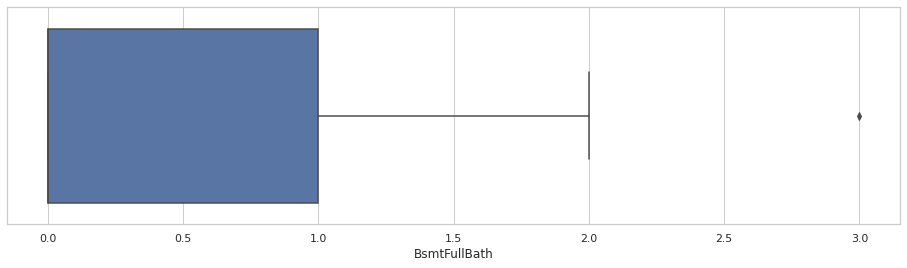

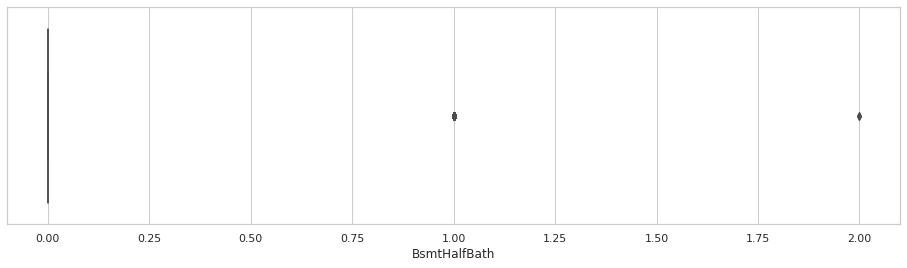

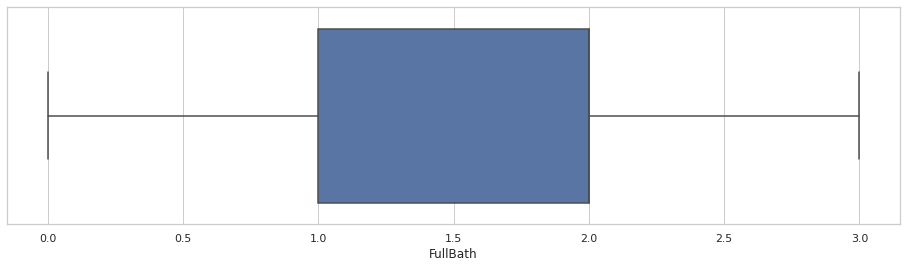

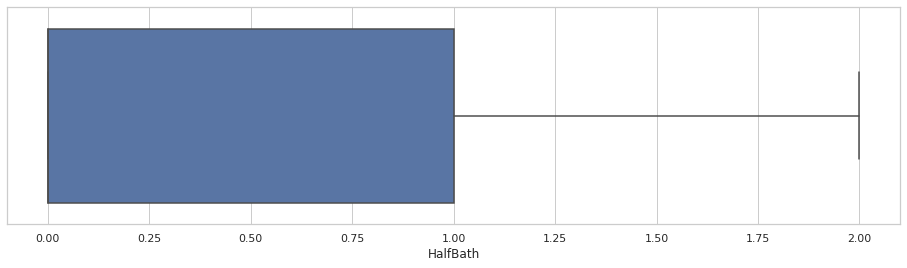

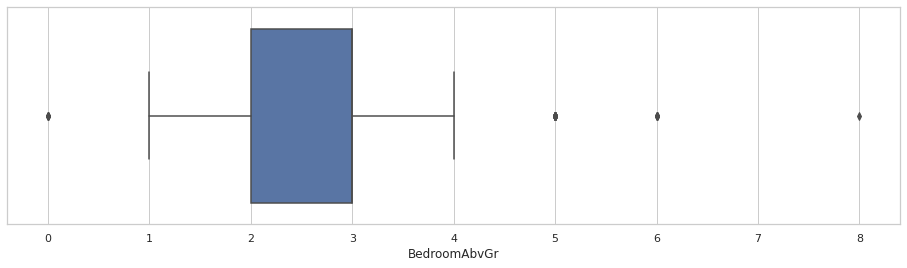

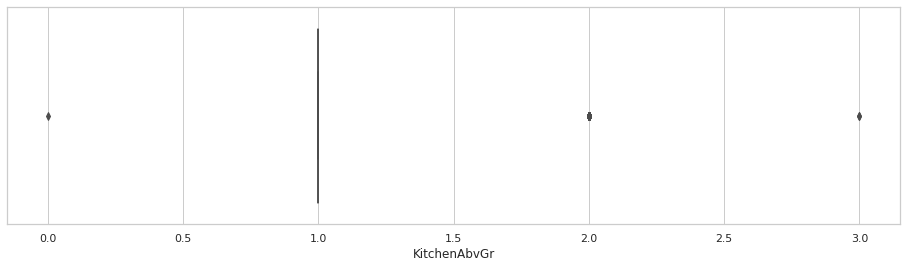

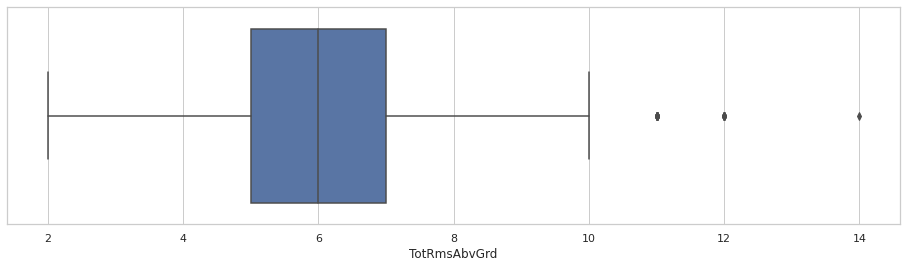

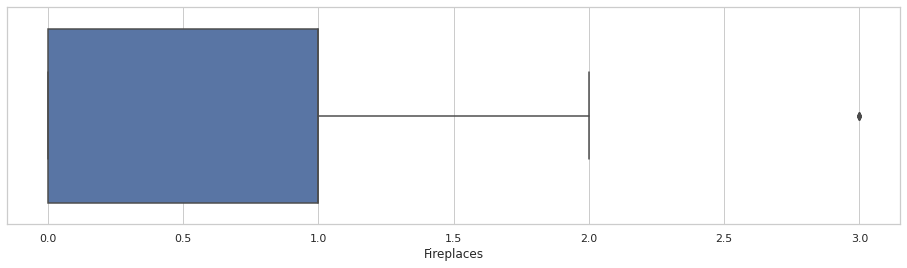

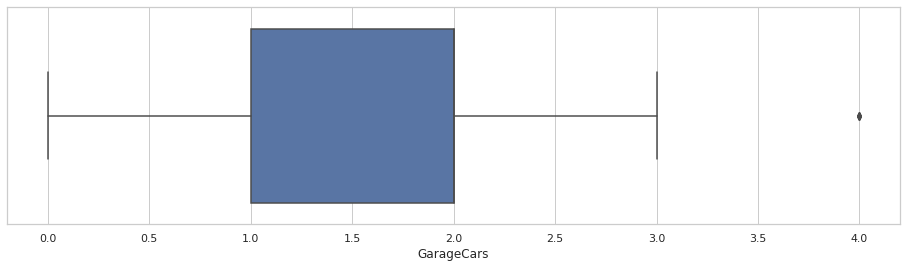

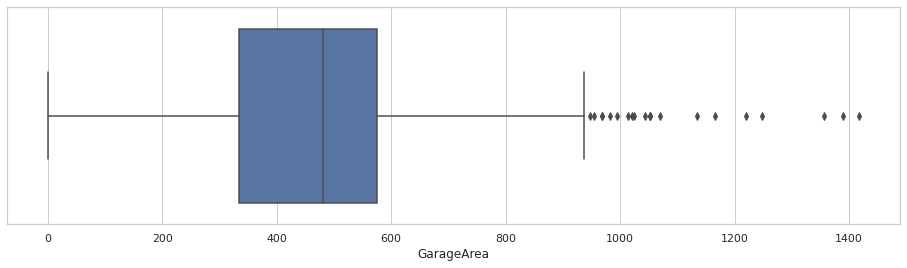

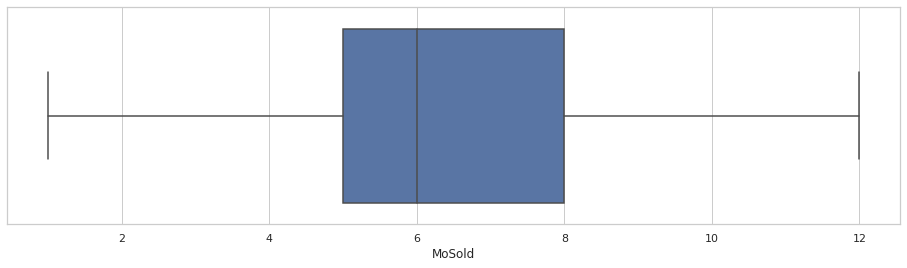

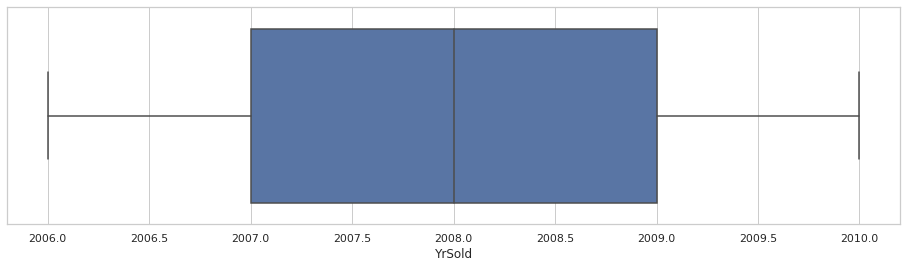

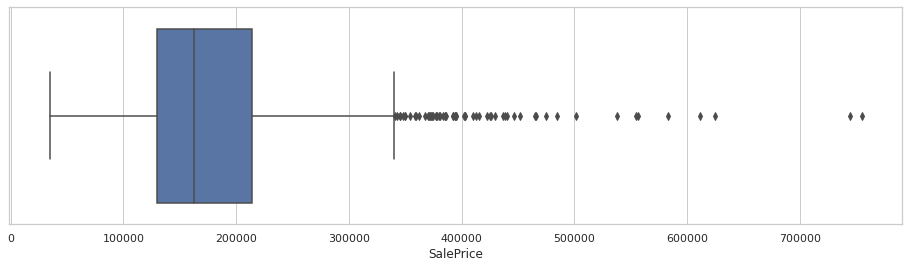

In [346]:
# outliers
for column in numcol:
    plt.figure(figsize=(16, 4))
    sns.set_theme(style="whitegrid")
    print(column)
    sns.boxplot(df[column])

MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageCars
GarageArea
MoSold
YrSold
SalePrice


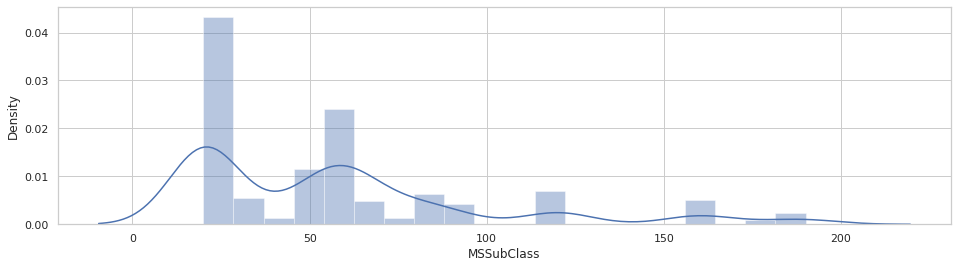

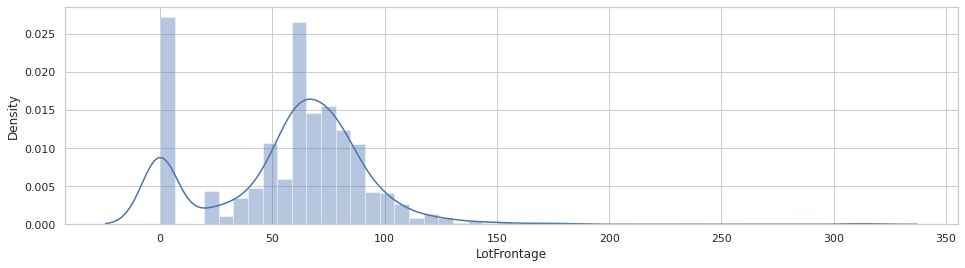

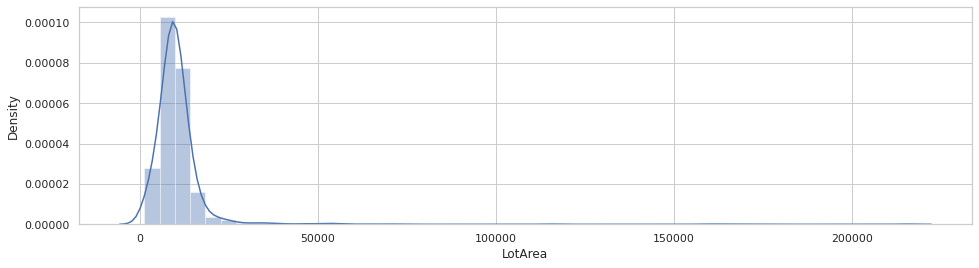

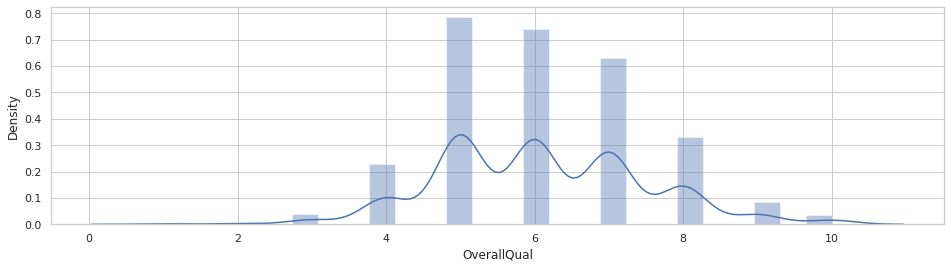

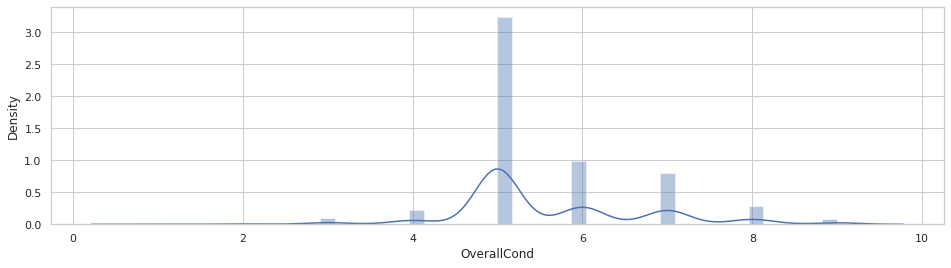

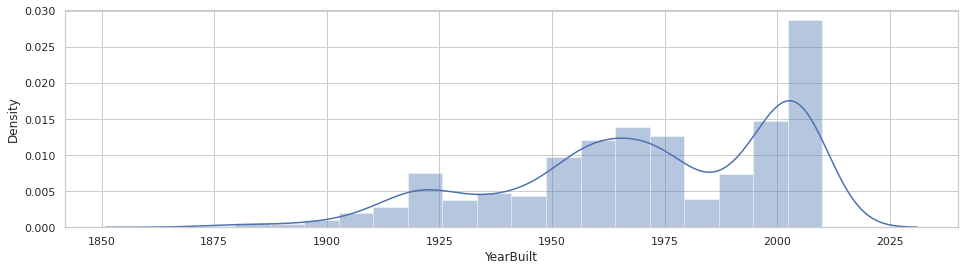

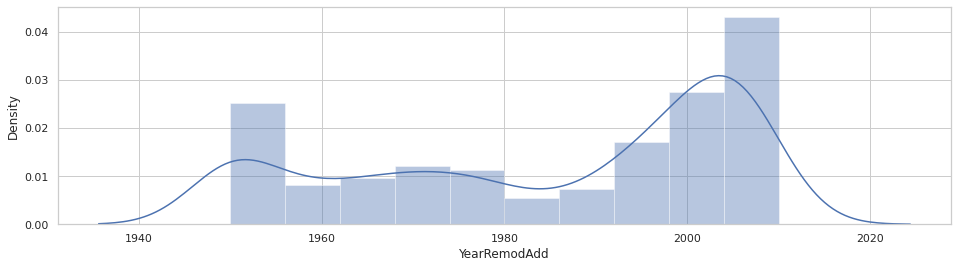

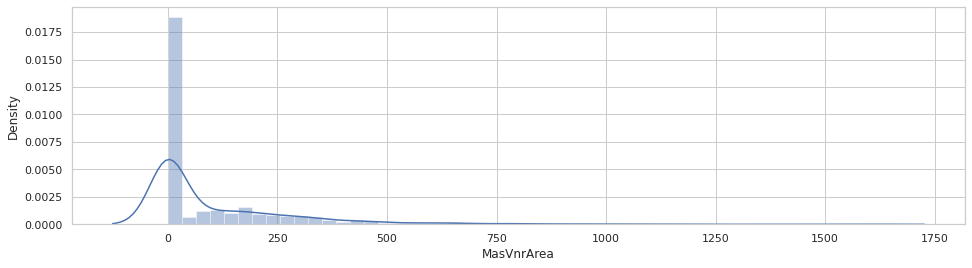

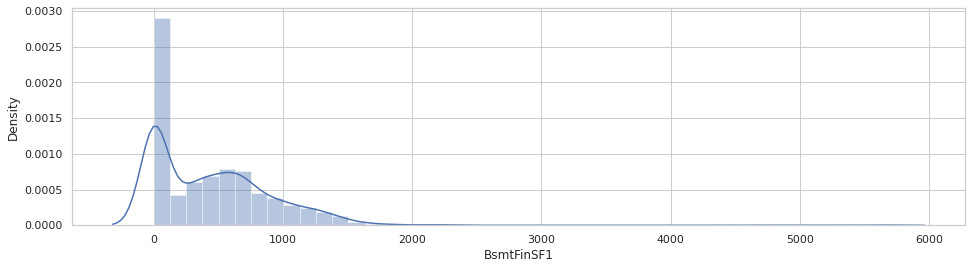

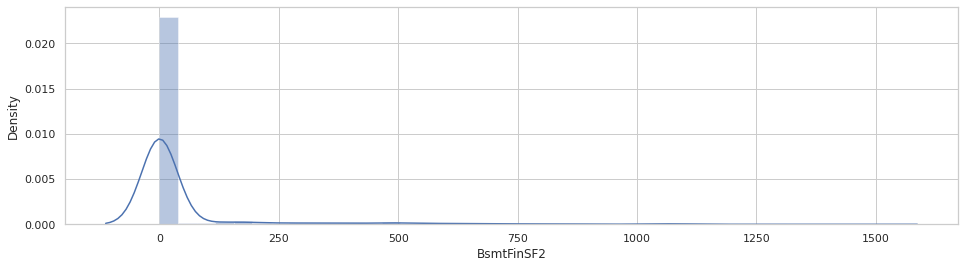

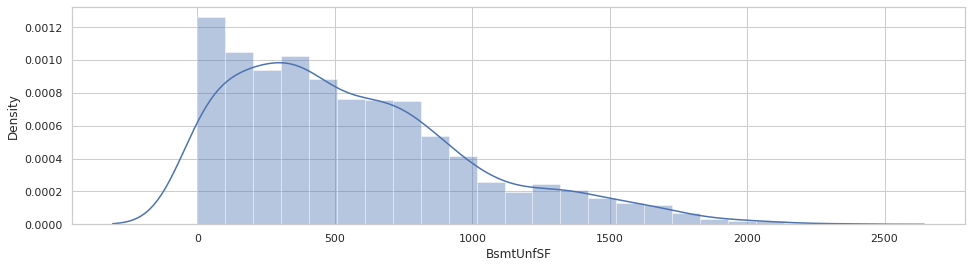

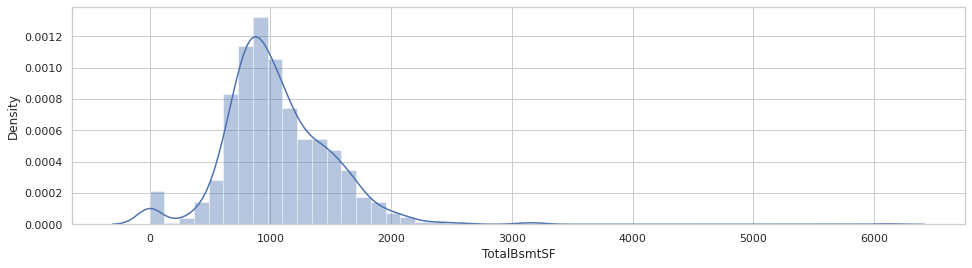

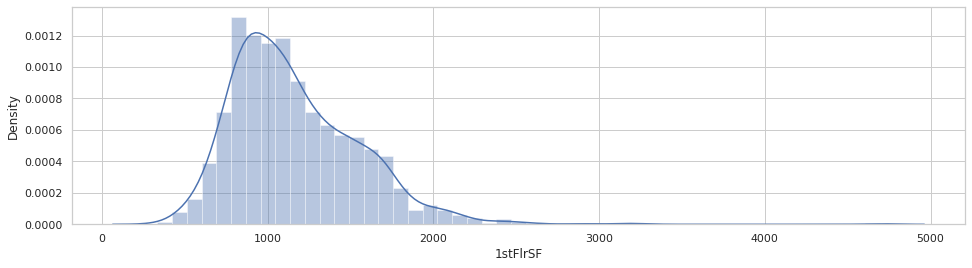

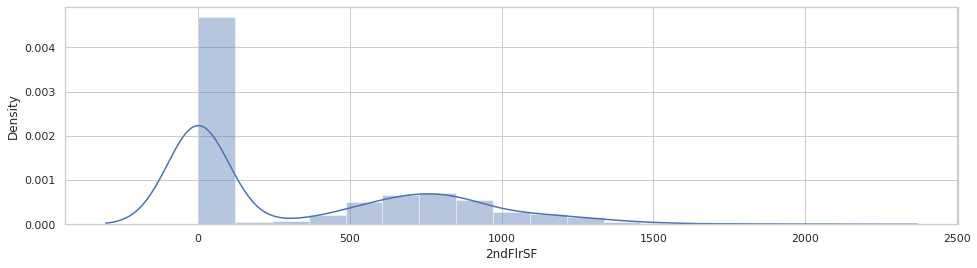

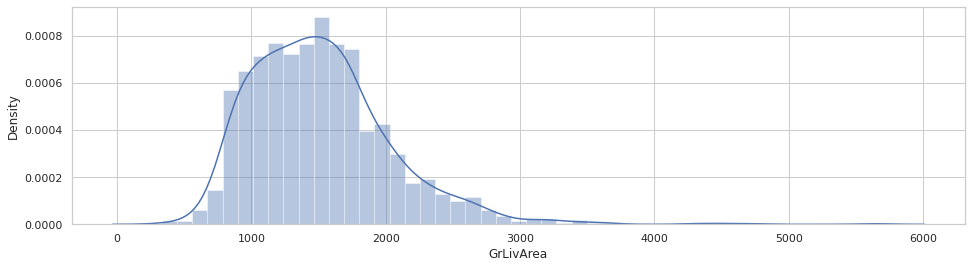

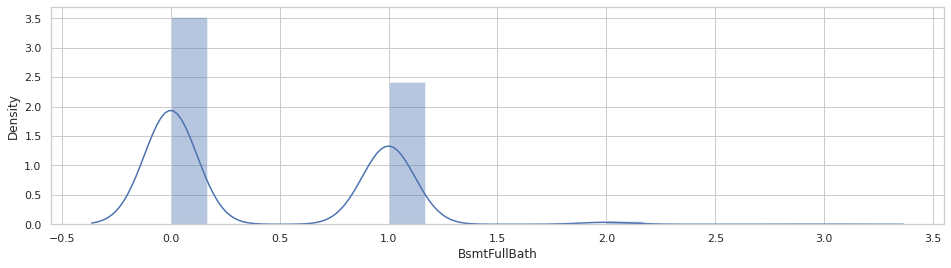

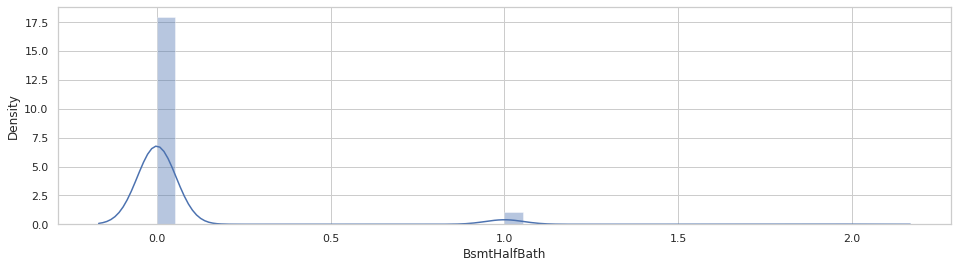

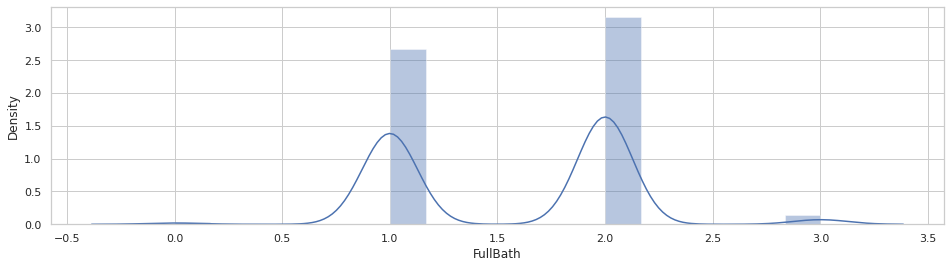

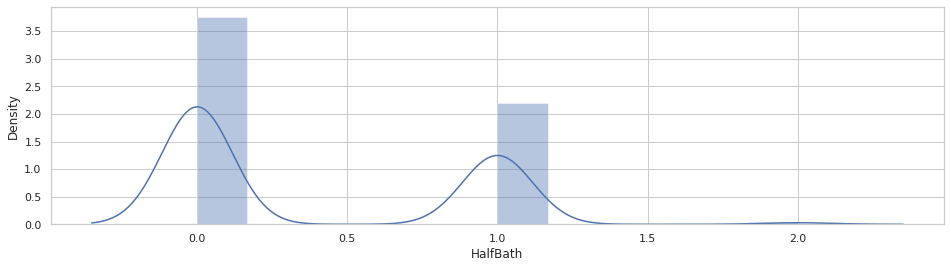

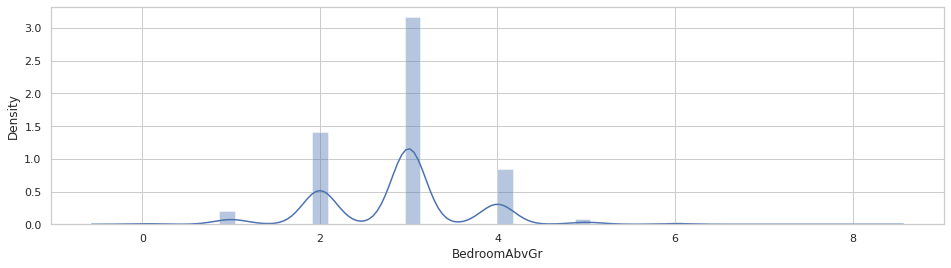

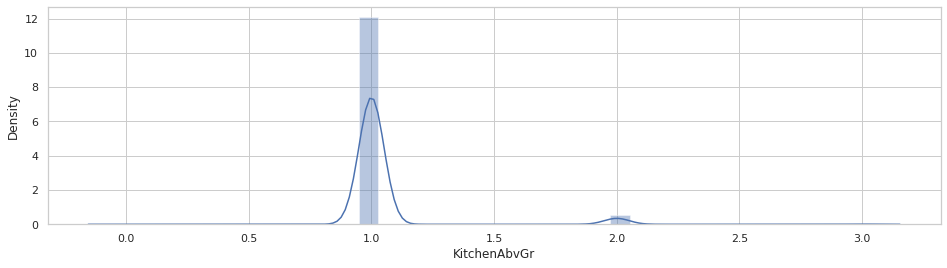

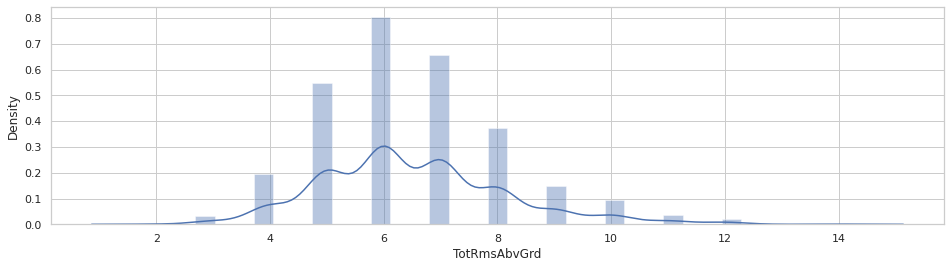

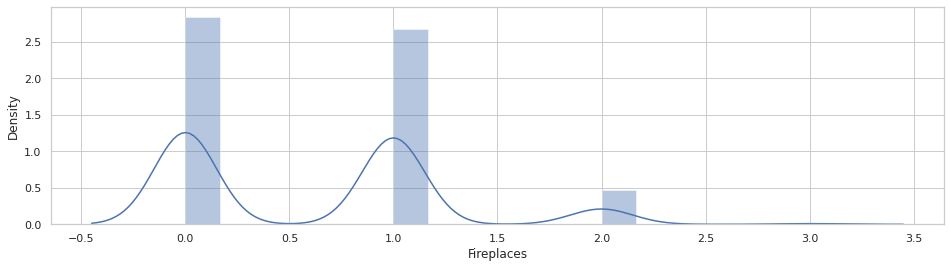

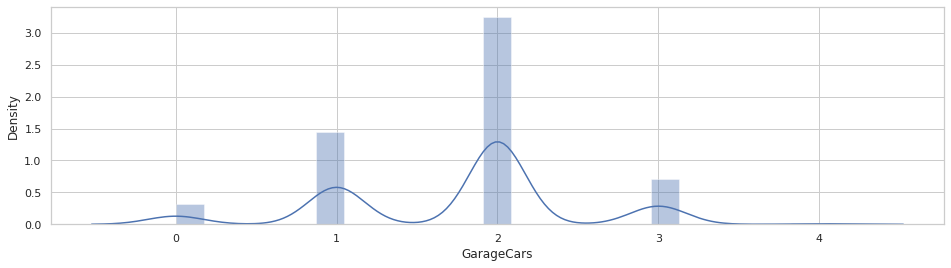

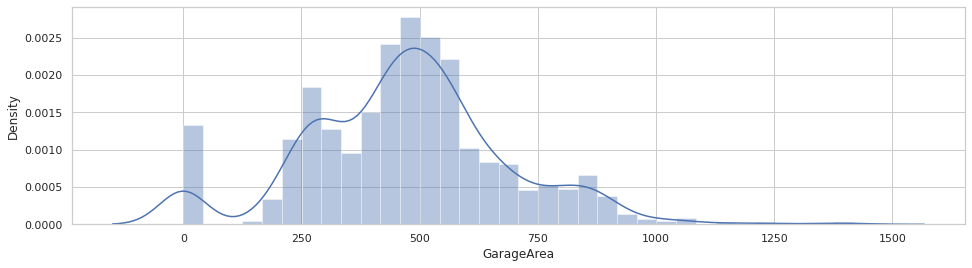

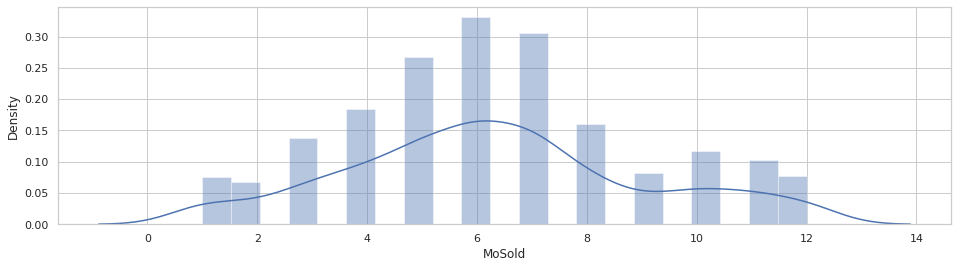

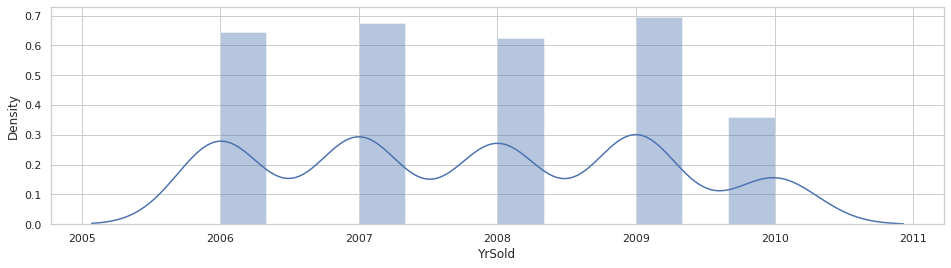

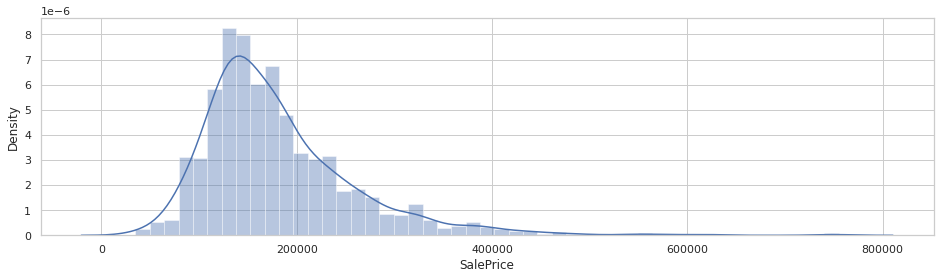

In [347]:
# Outliers
for column in numcol:
    plt.figure(figsize=(16, 4))
    sns.set_theme(style="whitegrid")
    print(column)
    sns.distplot(df[column])


In [124]:
# for normally distributed cols
normcol=['OverallQual','OverallCond','YearBuilt','TotRmsAbvGrd']
for i in normcol:
  upper_boundary=df[i].mean() + 3* df[i].std()
  lower_boundary=df[i].mean() - 3* df[i].std()
  df.loc[df[i]>=upper_boundary,i]=upper_boundary
  df.loc[df[i]<=lower_boundary,i]=lower_boundary

In [128]:
# for skewed cols
skewcols=['2ndFlrSF','BsmtUnfSF','BsmtFinSF2','TotalBsmtSF','GarageArea','1stFlrSF','LotArea','LotFrontage','MasVnrArea','SalePrice','BsmtFinSF1','GrLivArea','BedroomAbvGr','Fireplaces','GarageCars','WoodDeckSF','OpenPorchSF']
for i in skewcols:
  IQR=df[i].quantile(0.75)-df[i].quantile(0.25)
  lower_bridge=df[i].quantile(0.25)-(IQR*1.5)
  upper_bridge=df[i].quantile(0.75)+(IQR*1.5)
  df.loc[df[i]>=upper_bridge,i]=upper_bridge
  df.loc[df[i]<=lower_bridge,i]=lower_bridge

MSSubClass
MSZoning
LotFrontage
LotArea
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageFinish
GarageCars
GarageArea
GarageQual
PavedDrive
WoodDeckSF
OpenPorchSF
Fence
MoSold
YrSold
SaleType
SaleCondition
SalePrice


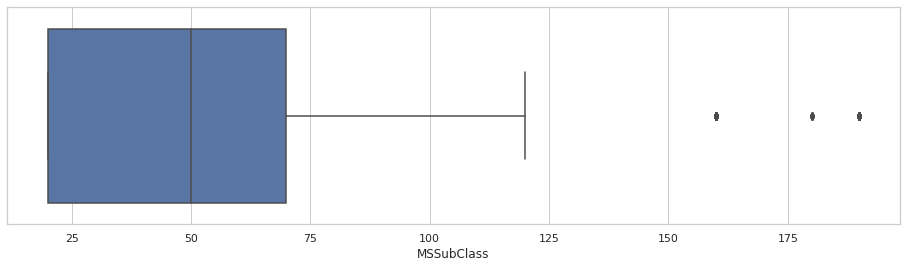

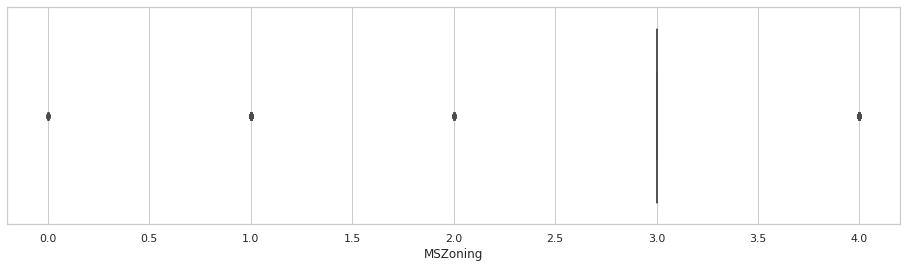

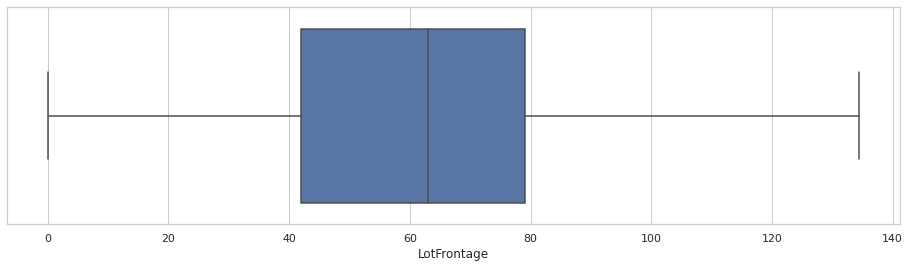

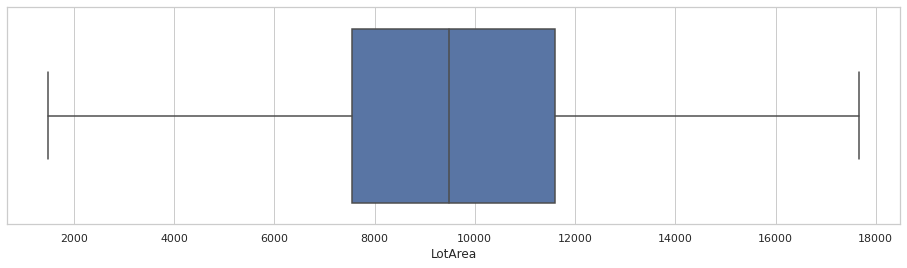

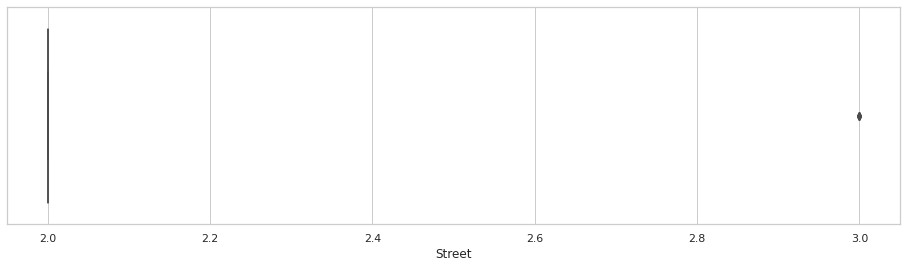

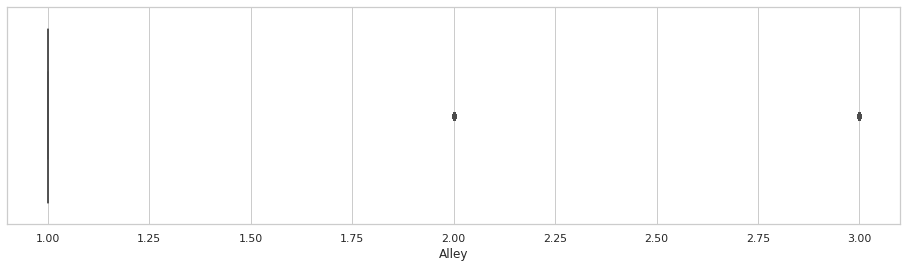

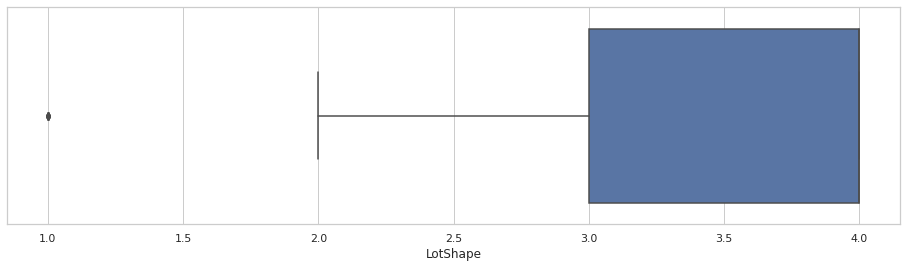

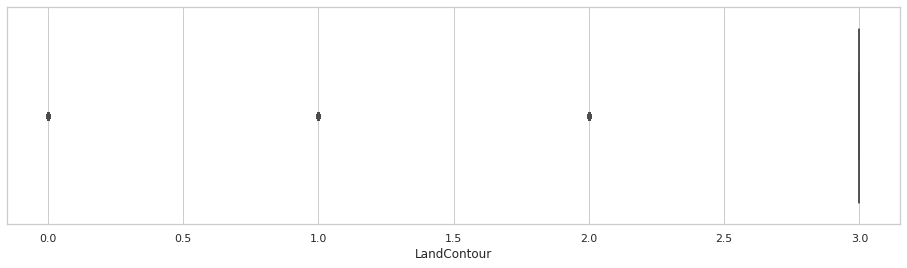

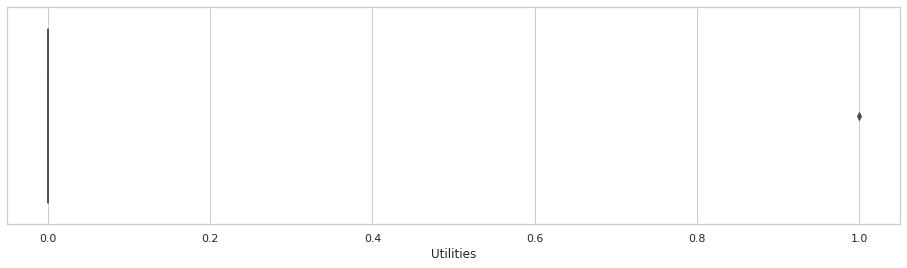

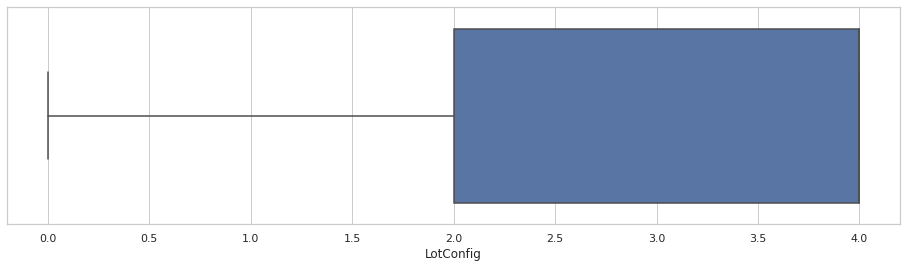

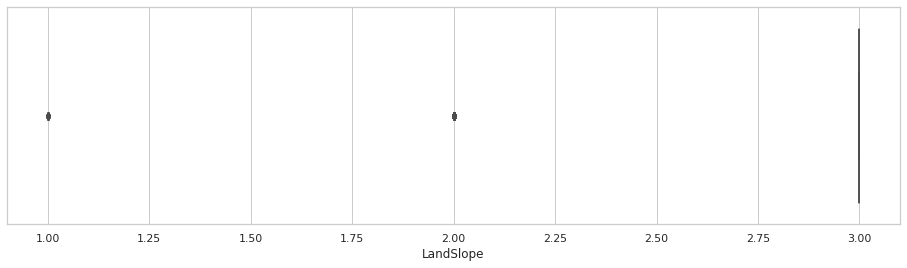

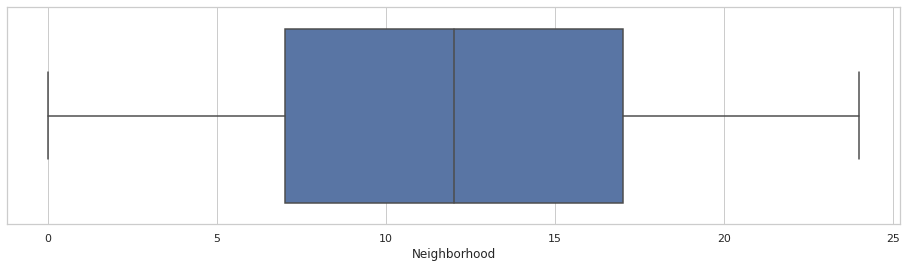

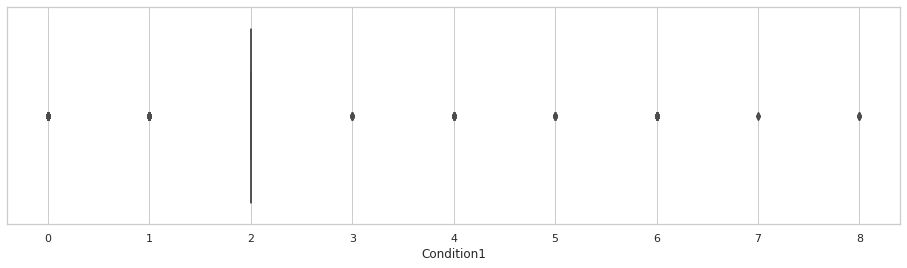

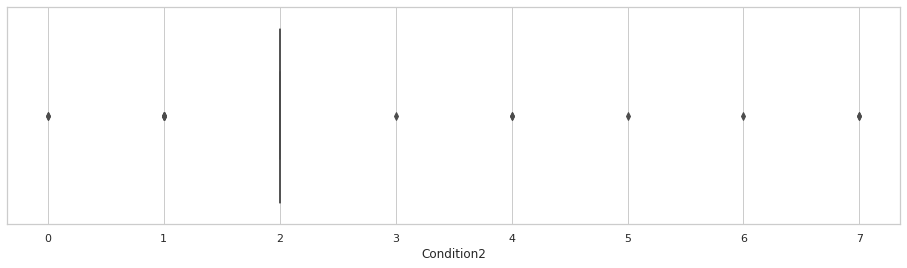

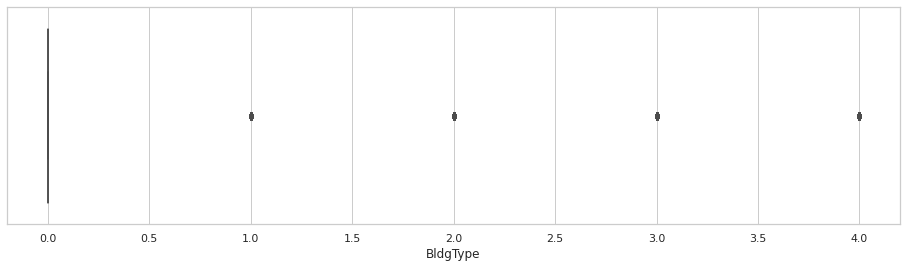

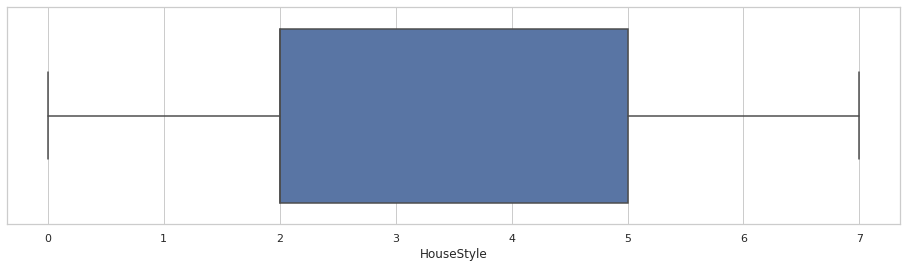

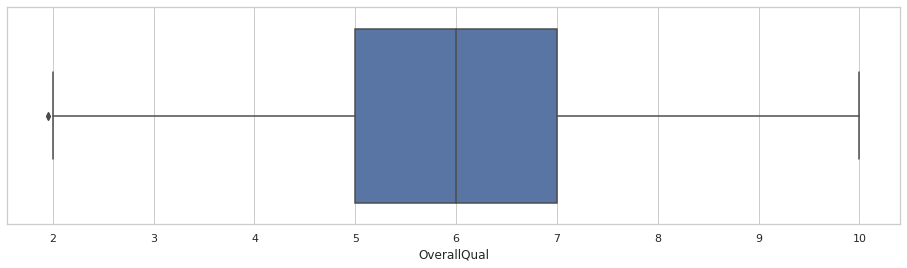

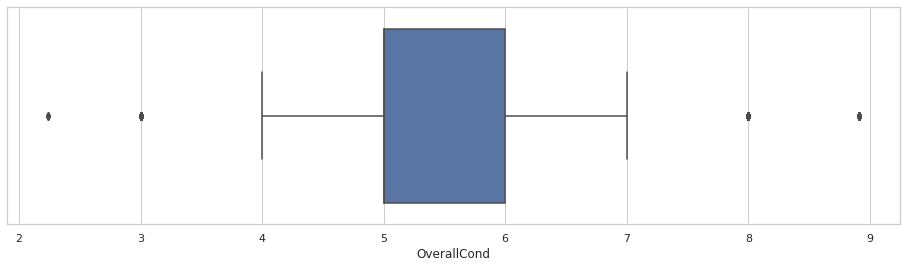

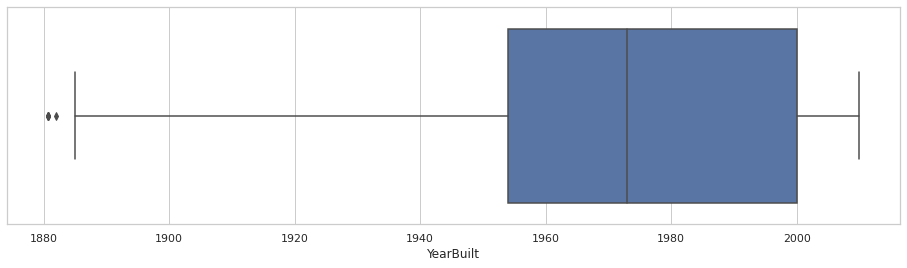

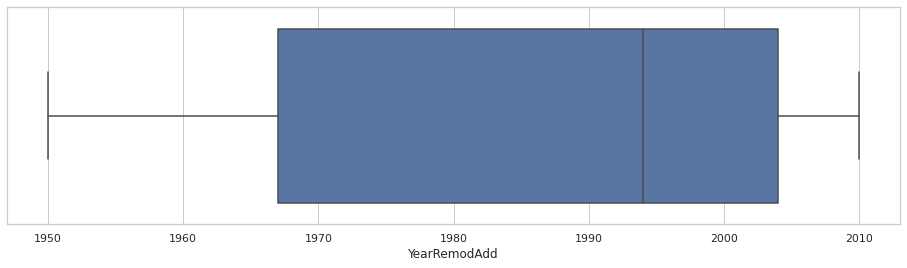

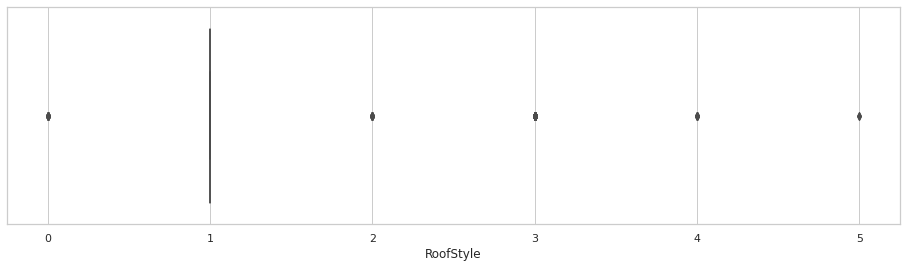

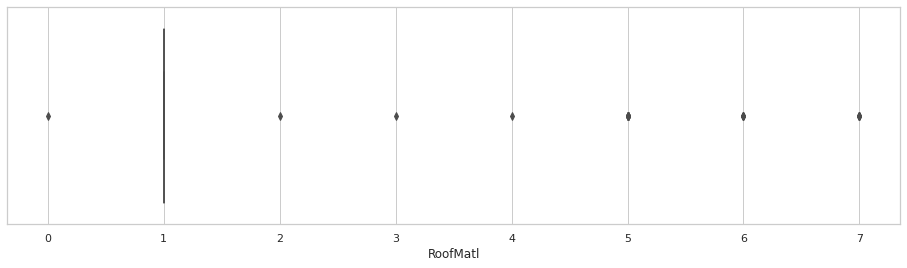

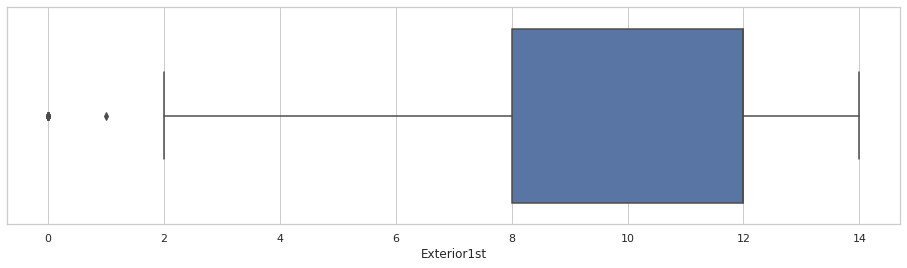

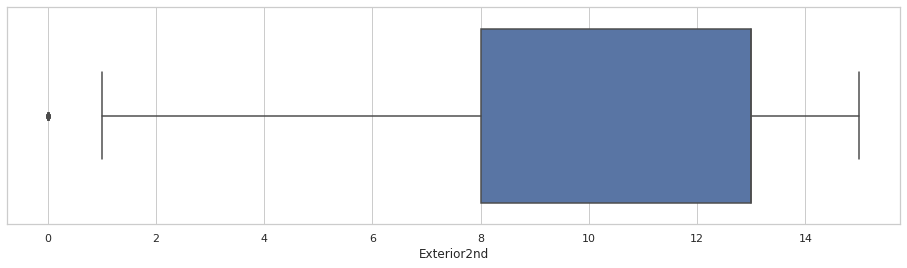

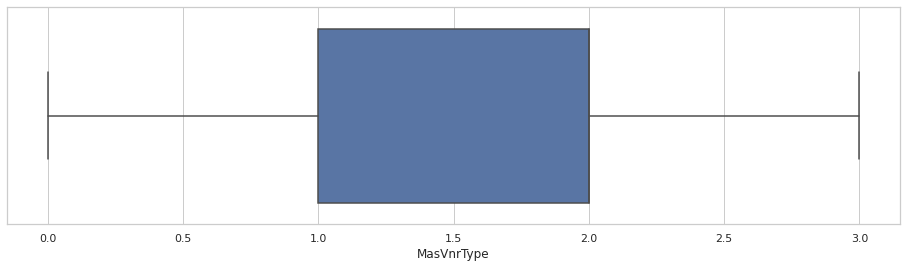

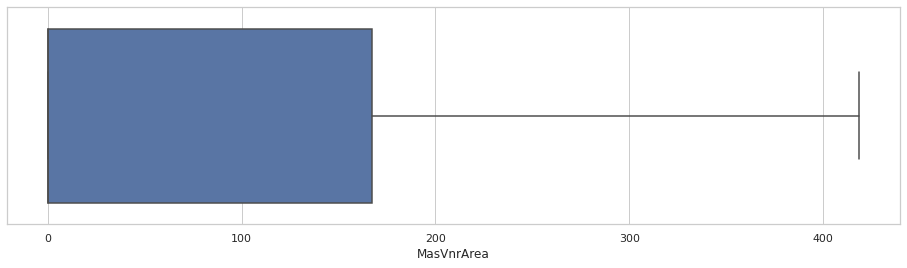

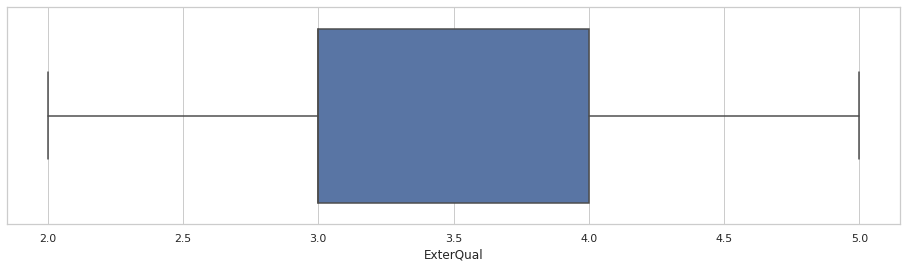

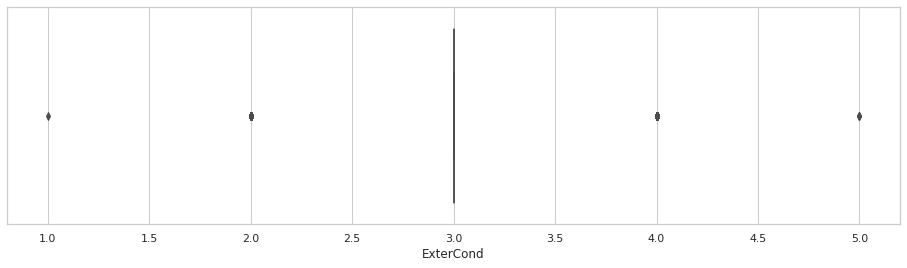

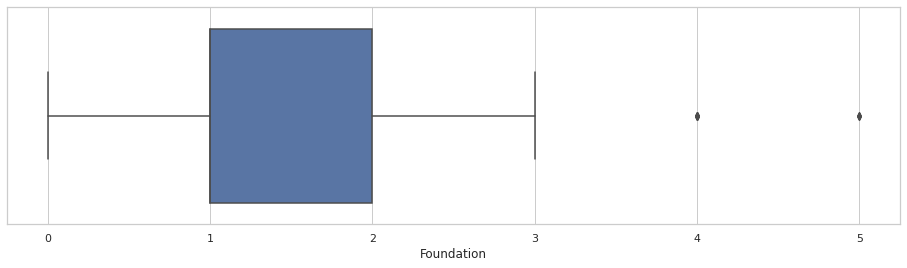

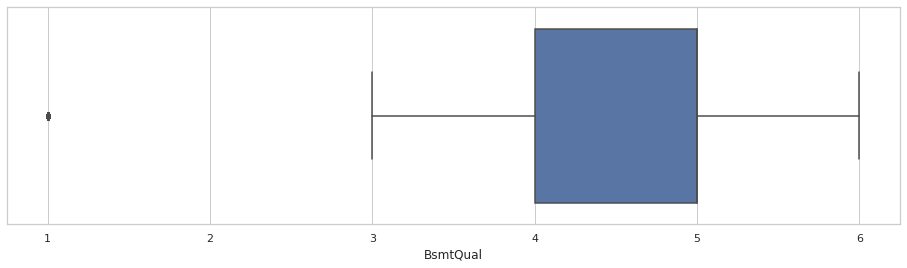

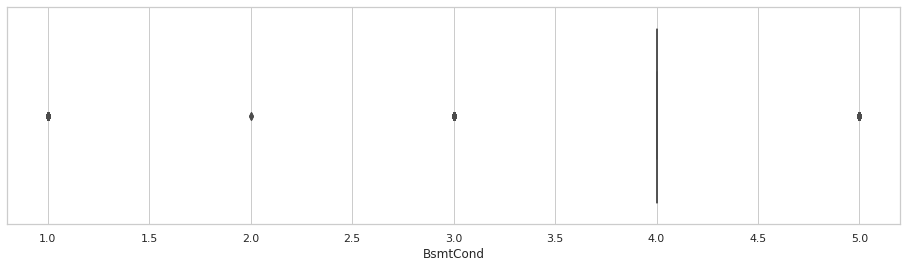

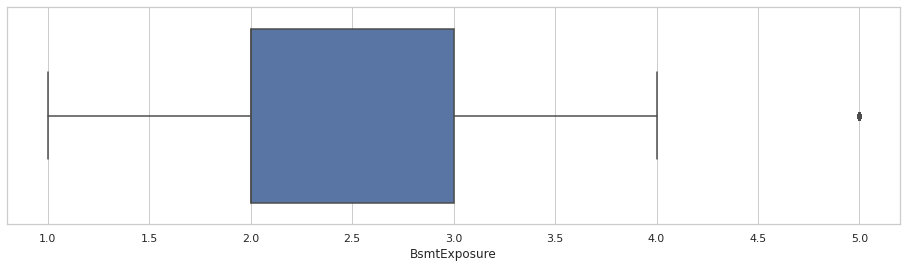

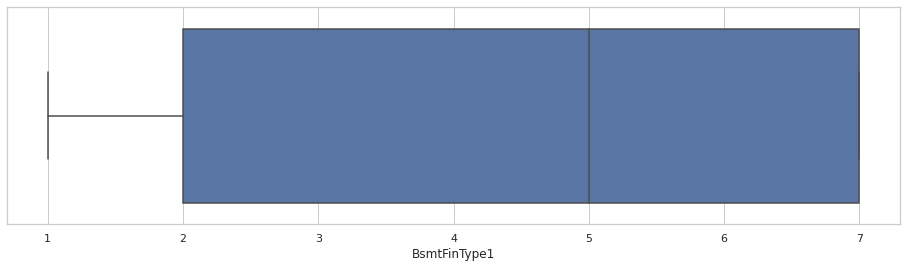

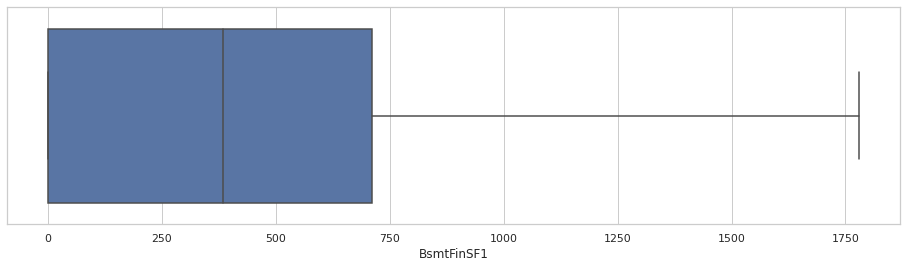

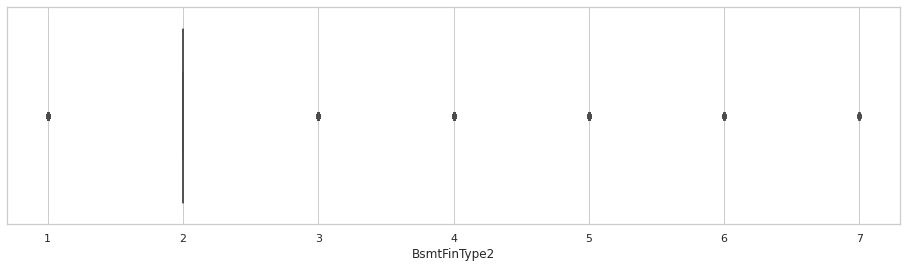

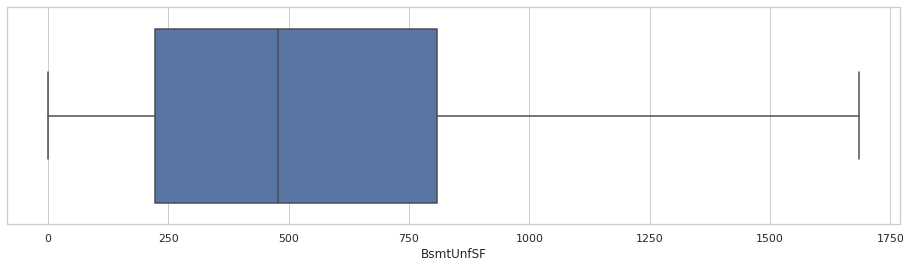

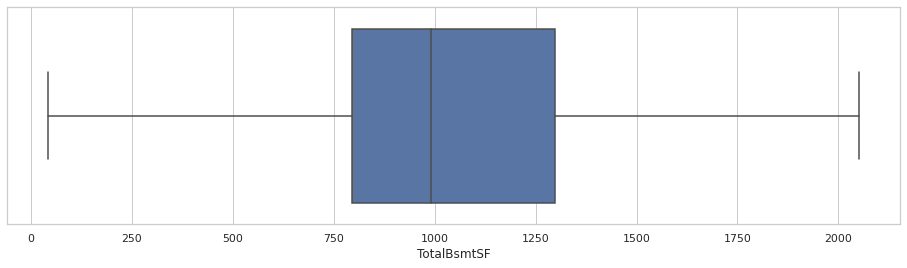

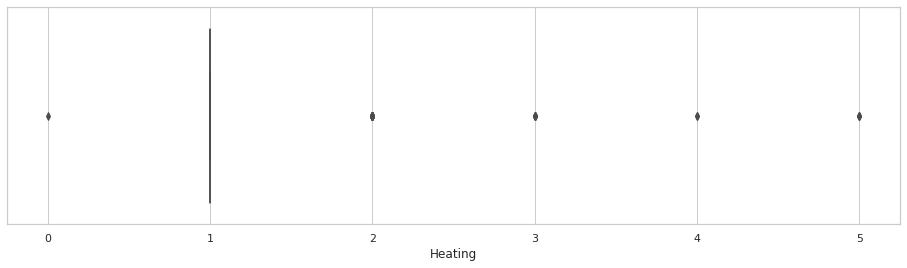

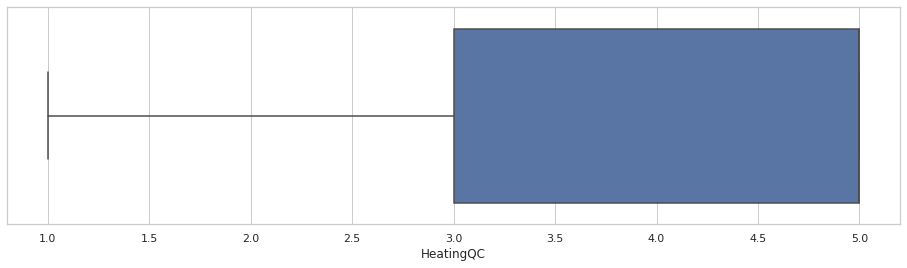

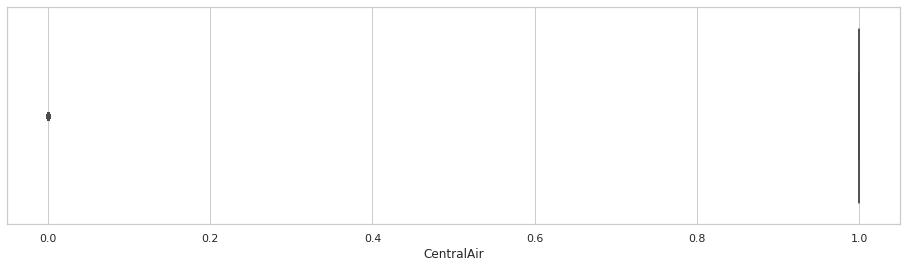

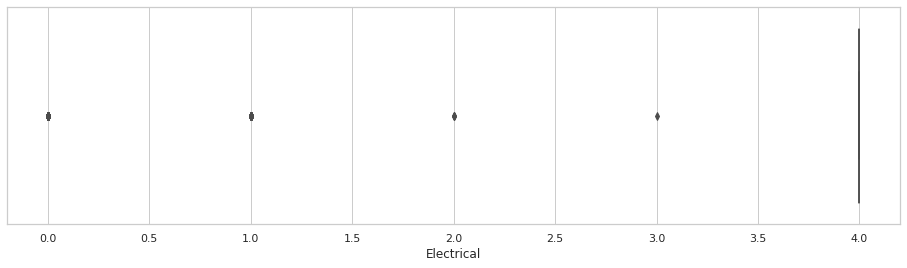

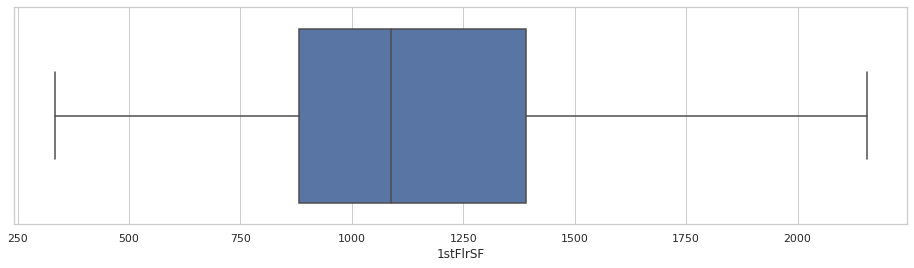

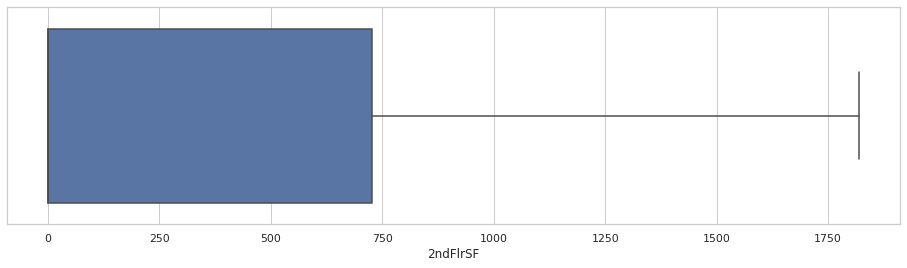

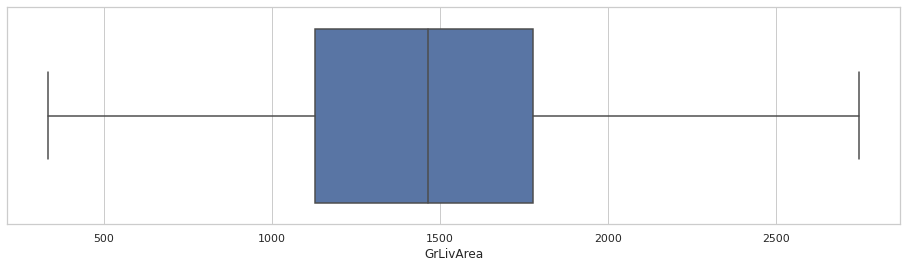

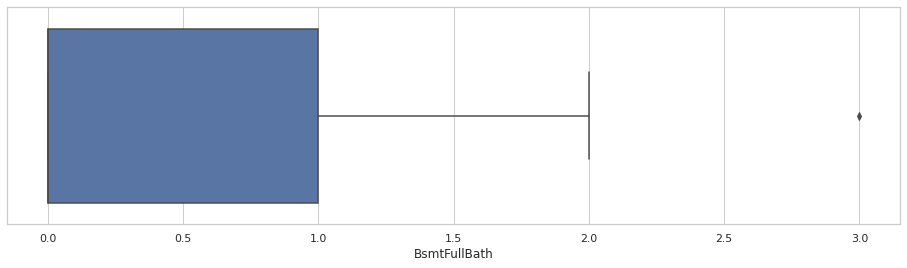

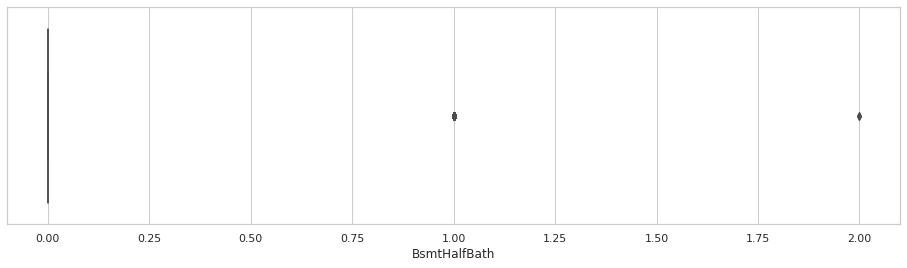

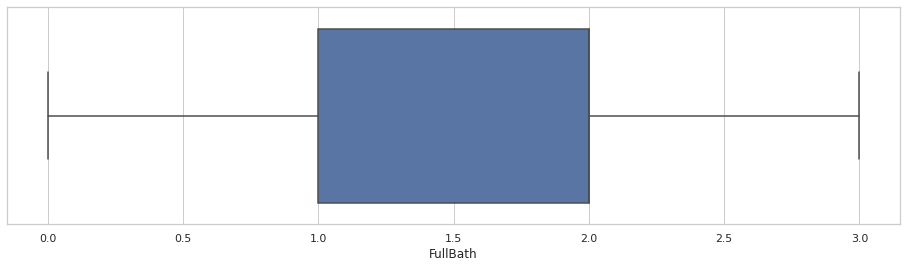

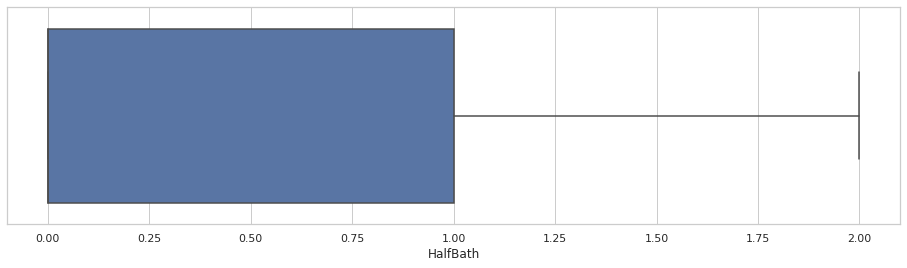

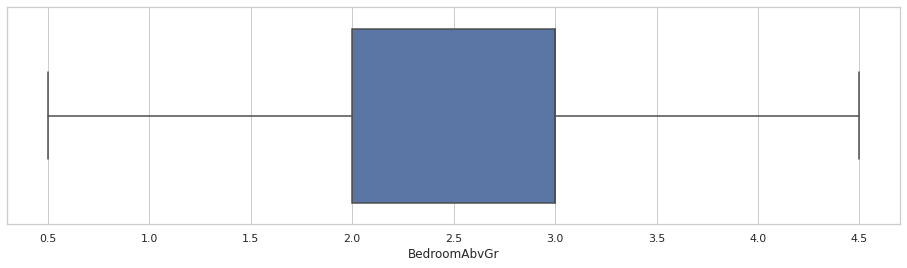

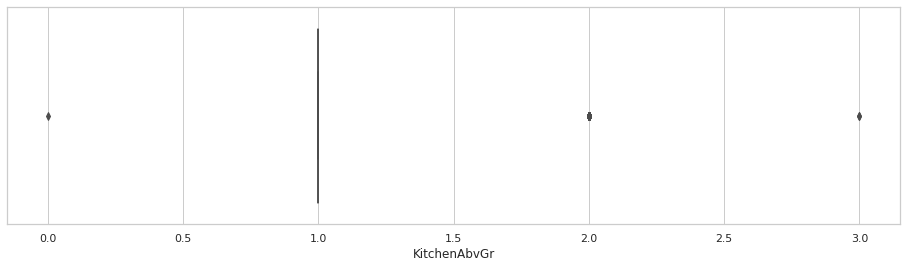

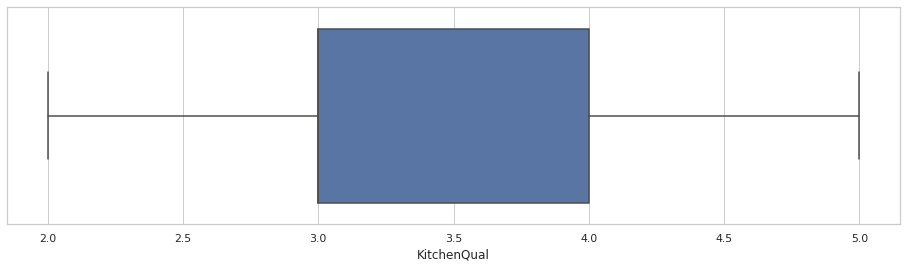

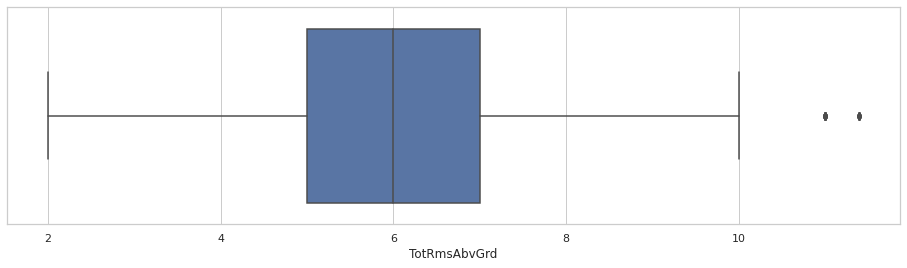

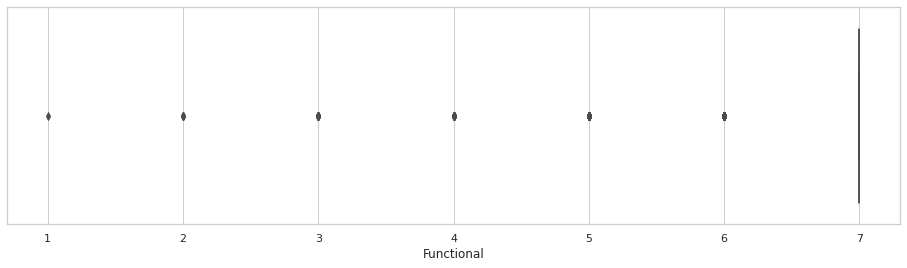

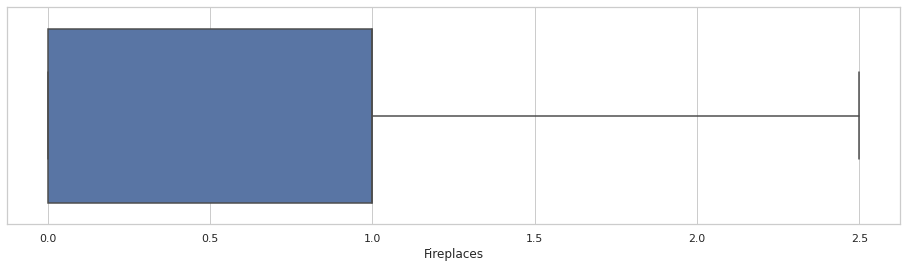

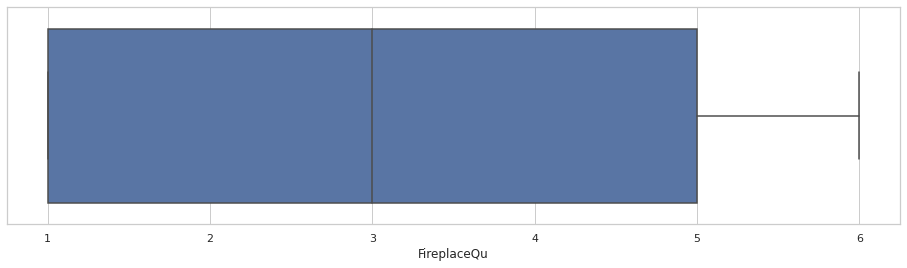

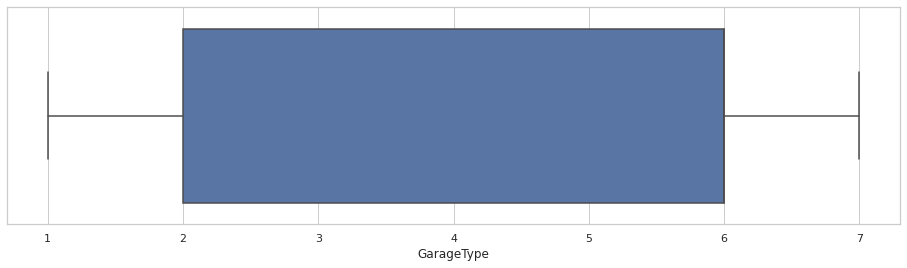

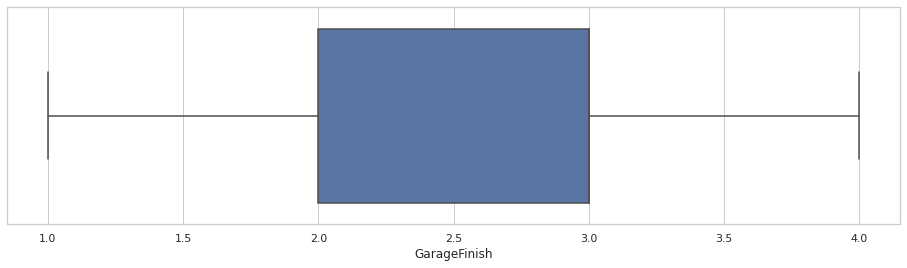

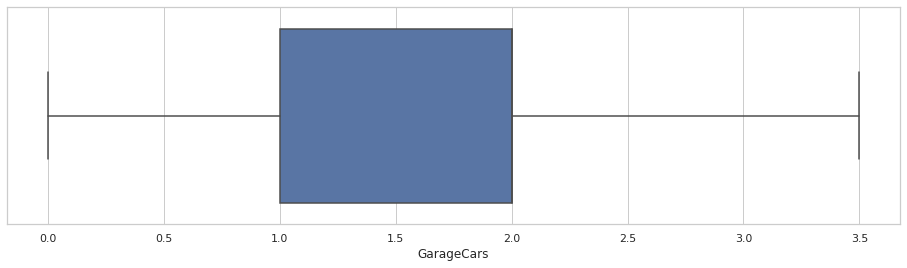

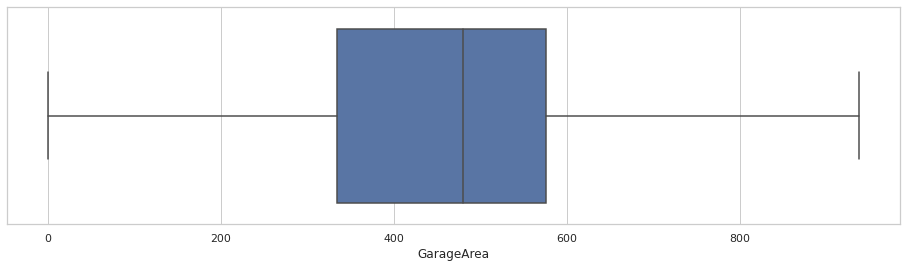

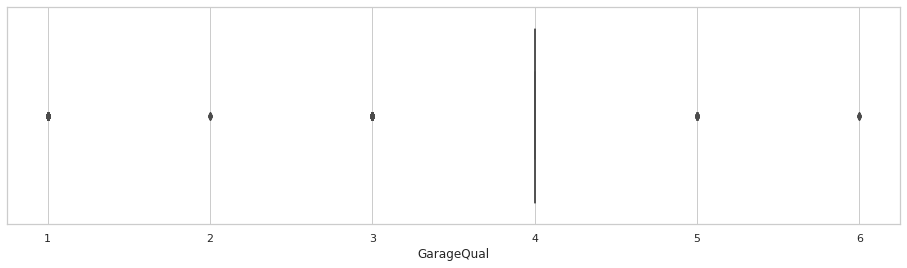

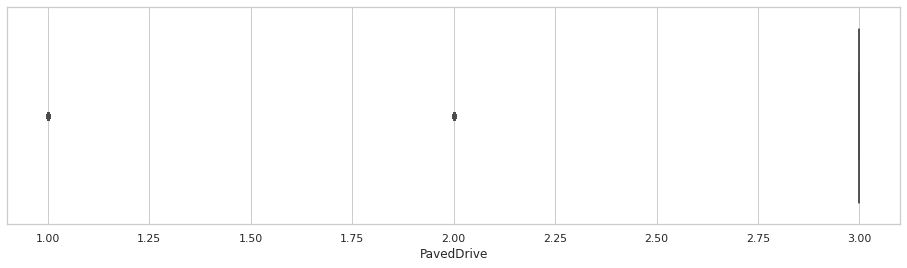

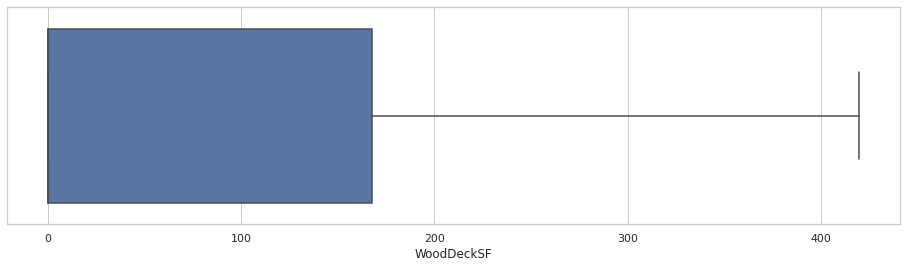

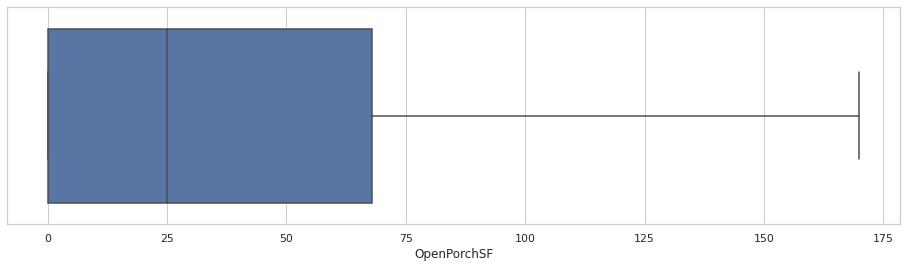

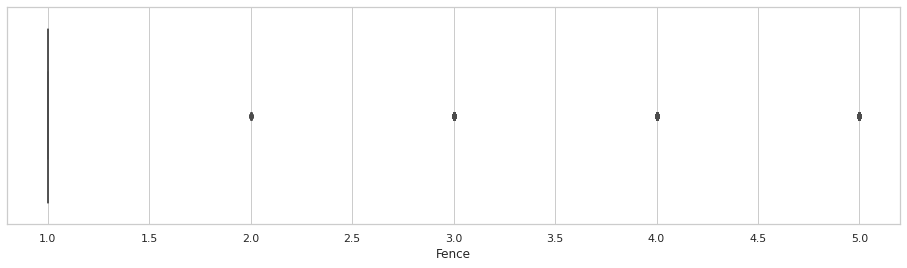

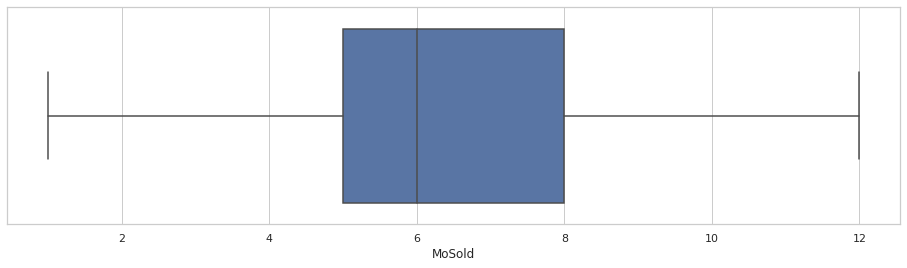

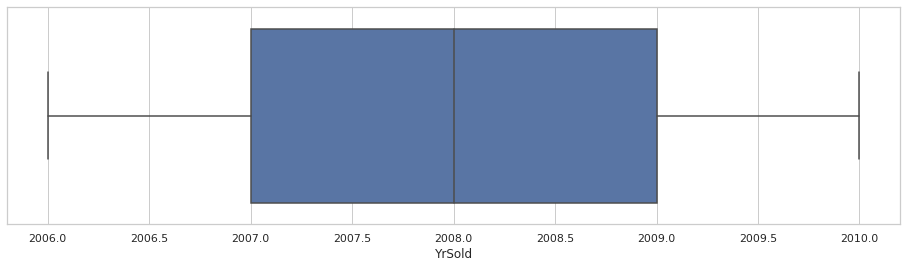

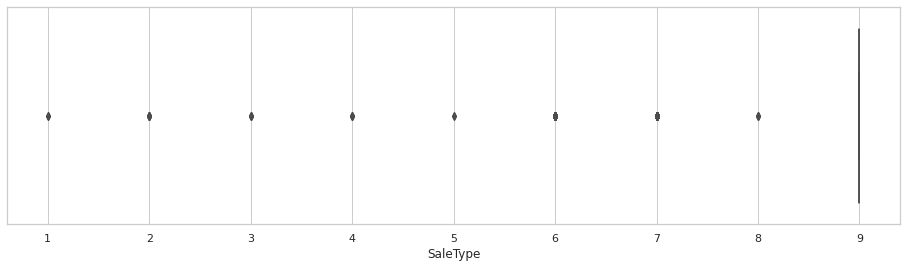

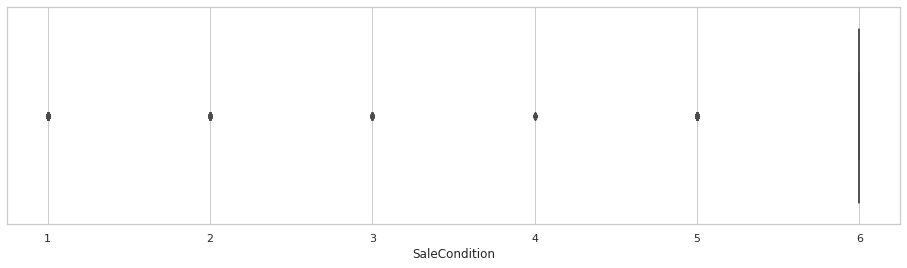

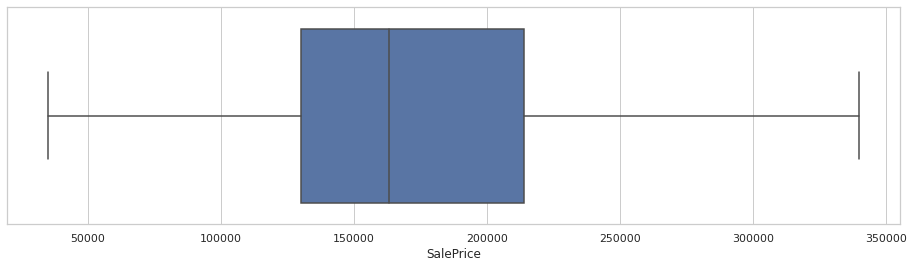

In [129]:
for column in numcol:
    plt.figure(figsize=(16, 4))
    sns.set_theme(style="whitegrid")
    print(column)
    sns.boxplot(df[column])

MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageCars
GarageArea
MoSold
YrSold
SalePrice


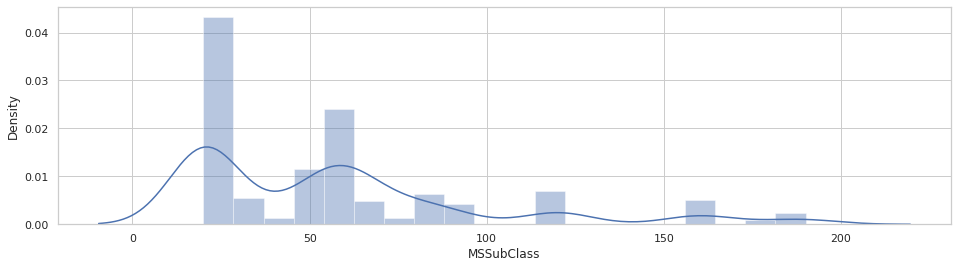

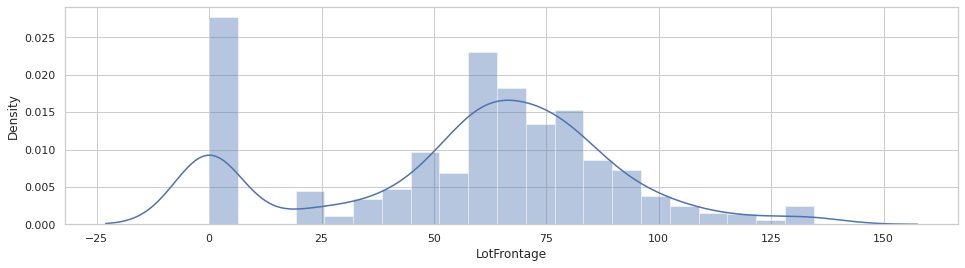

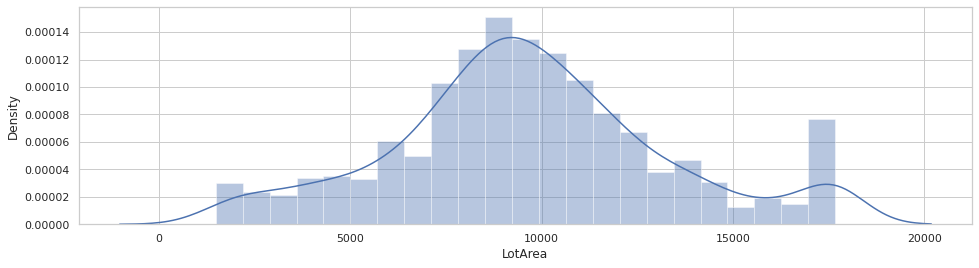

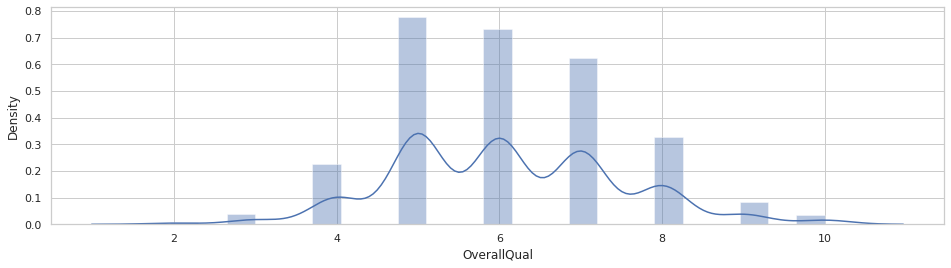

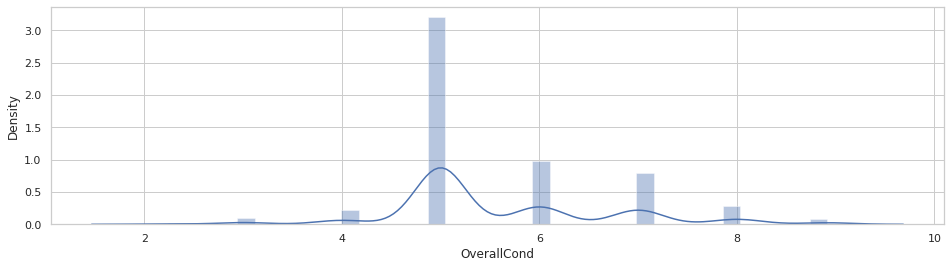

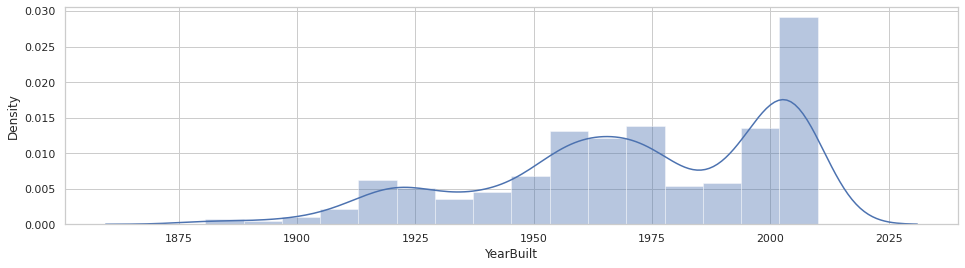

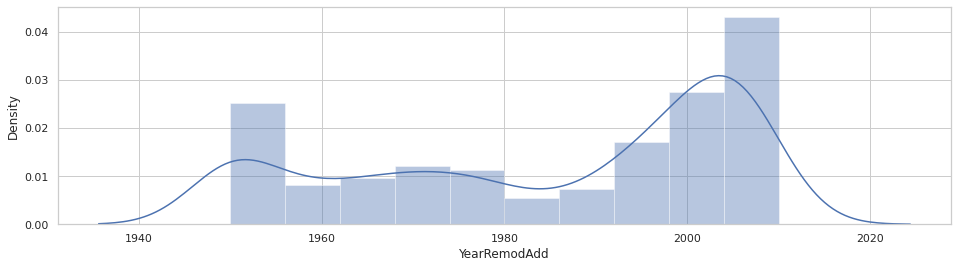

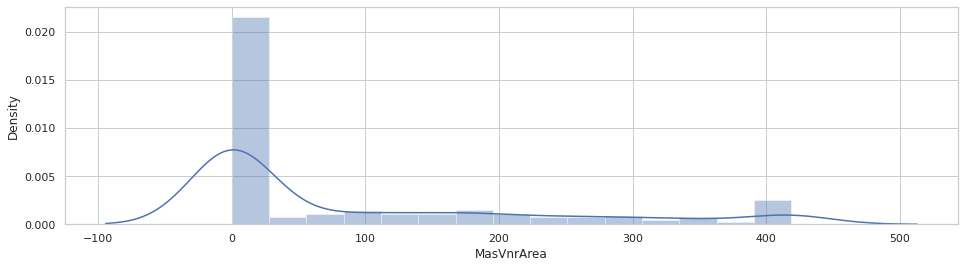

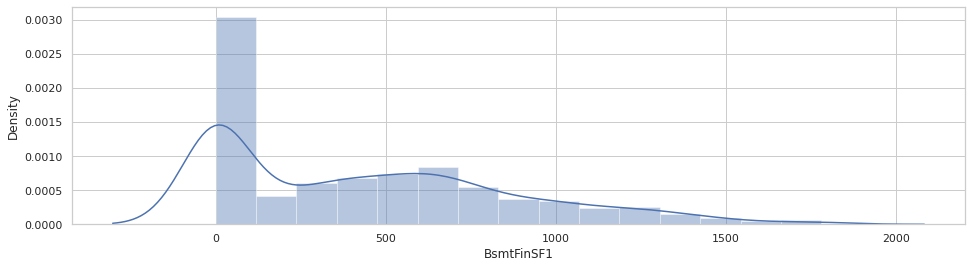

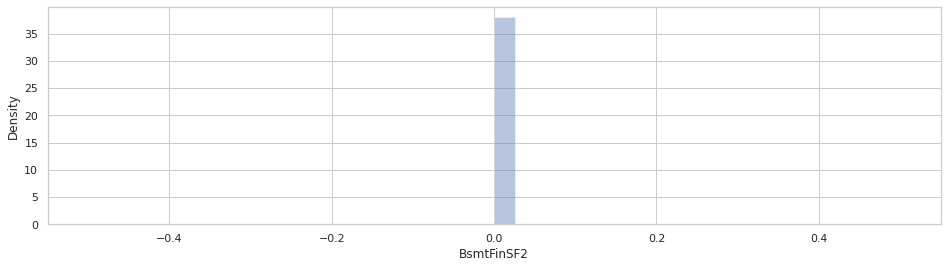

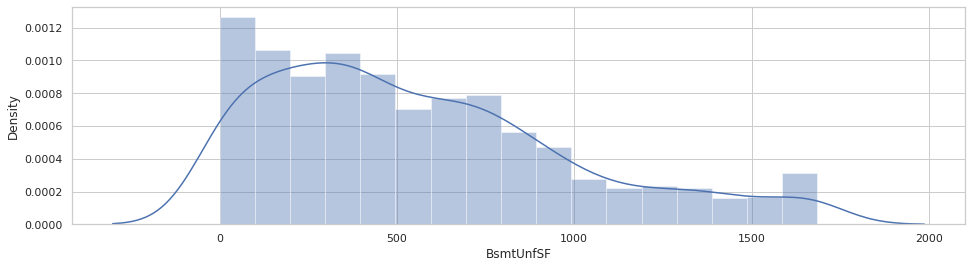

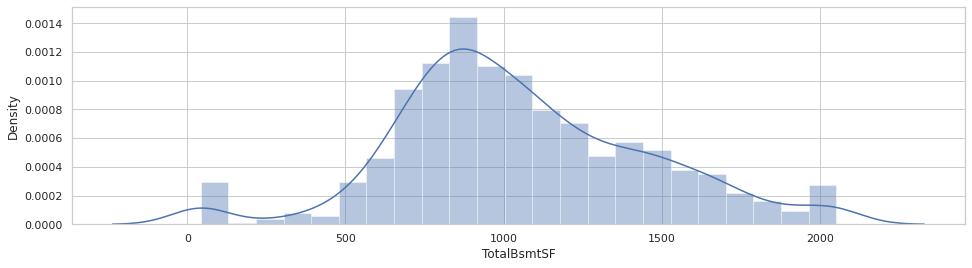

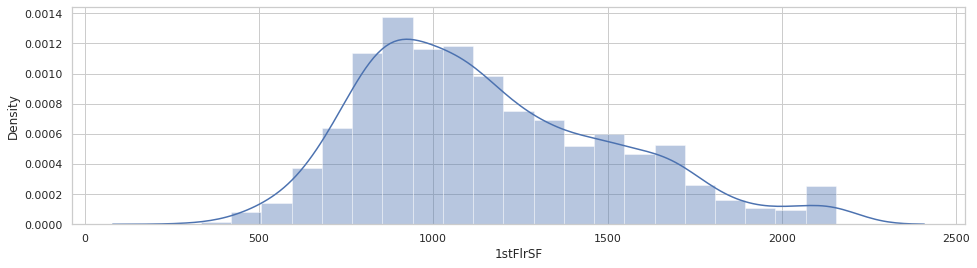

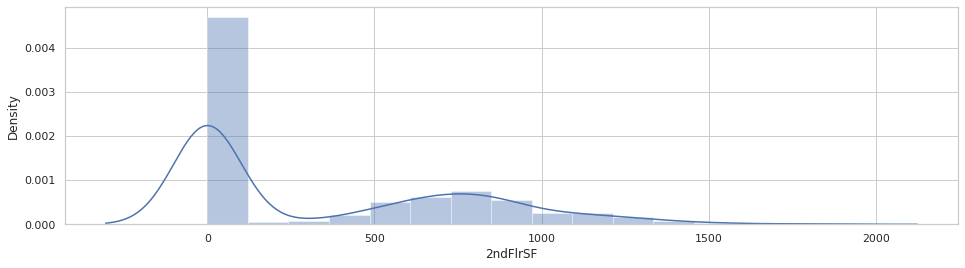

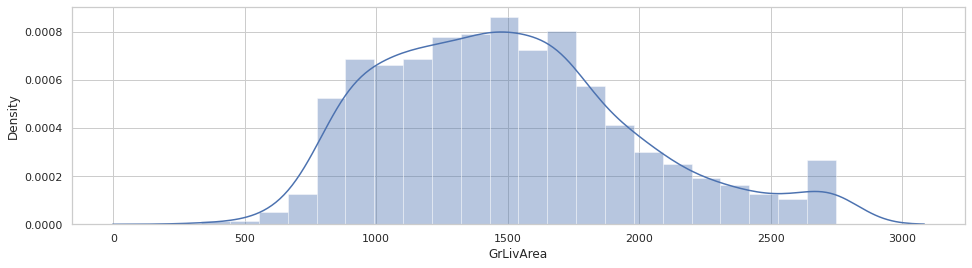

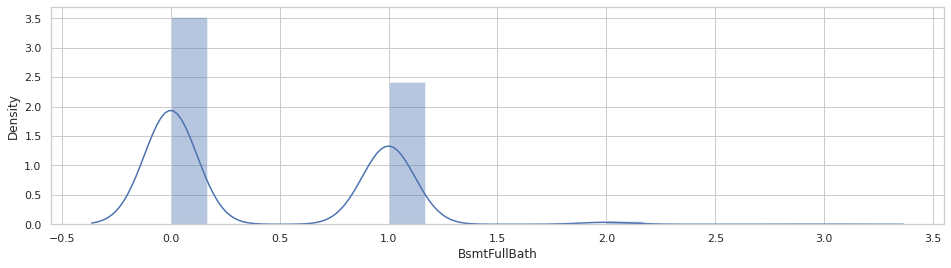

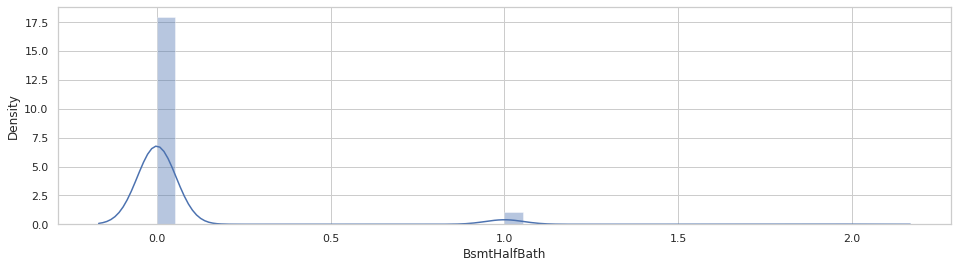

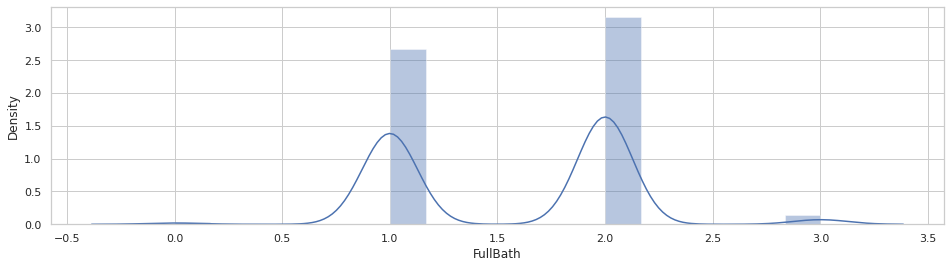

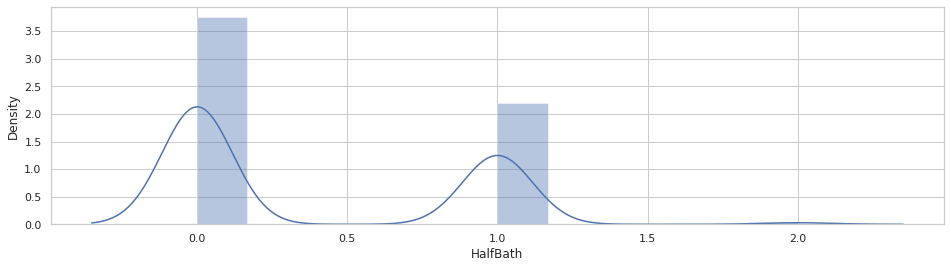

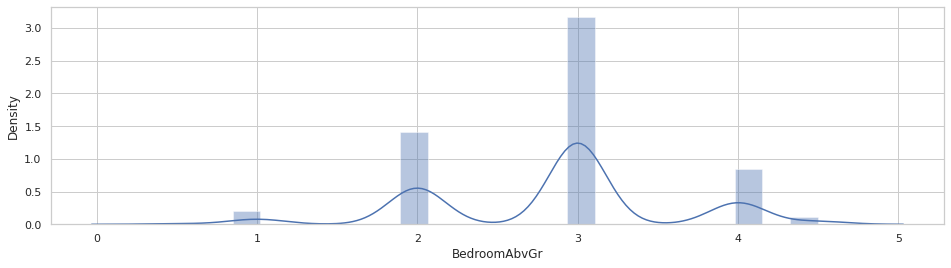

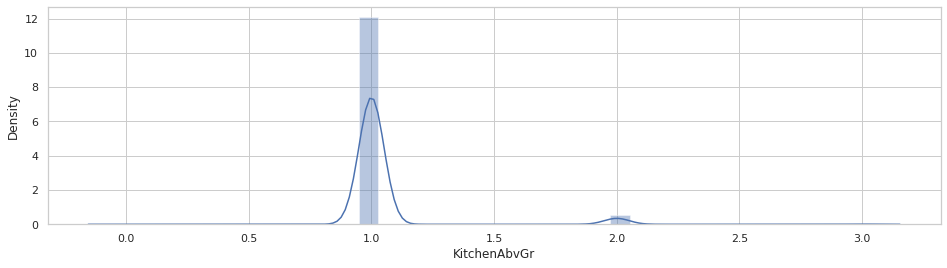

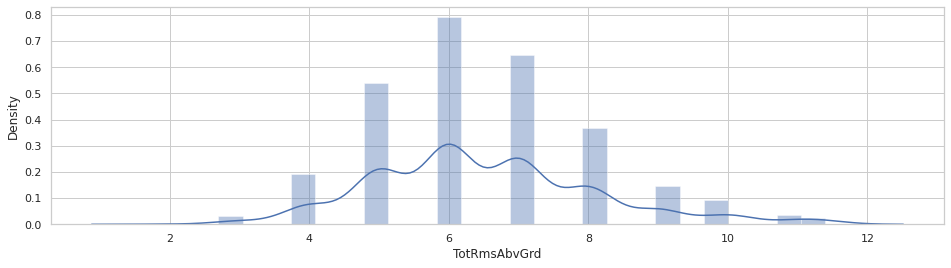

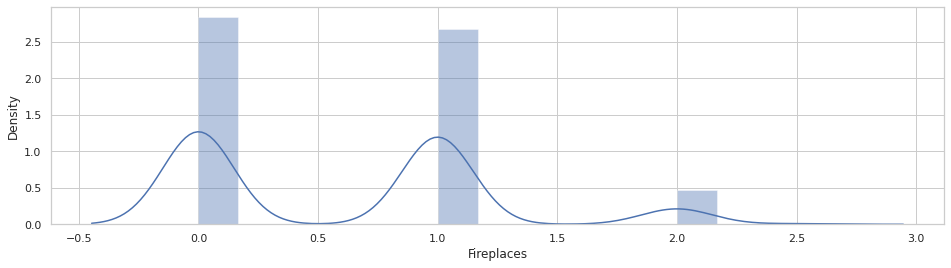

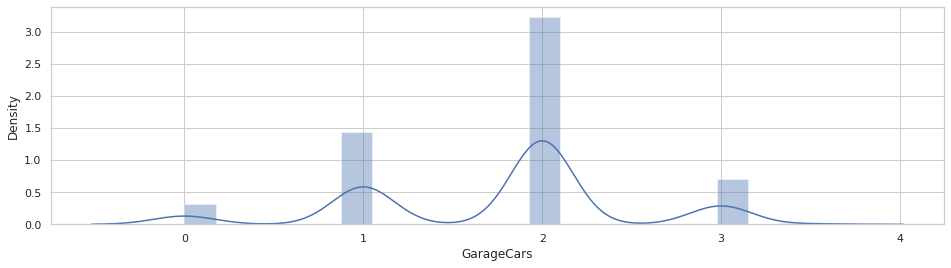

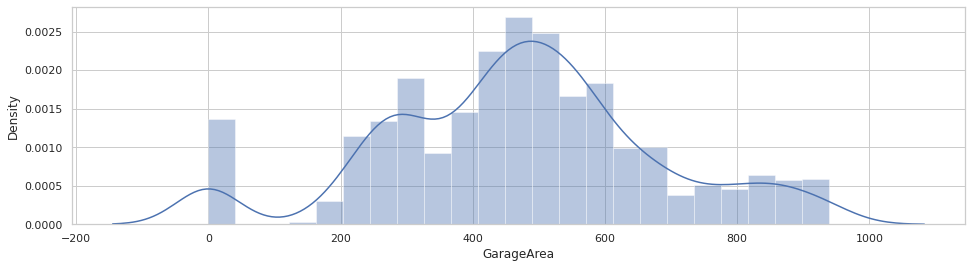

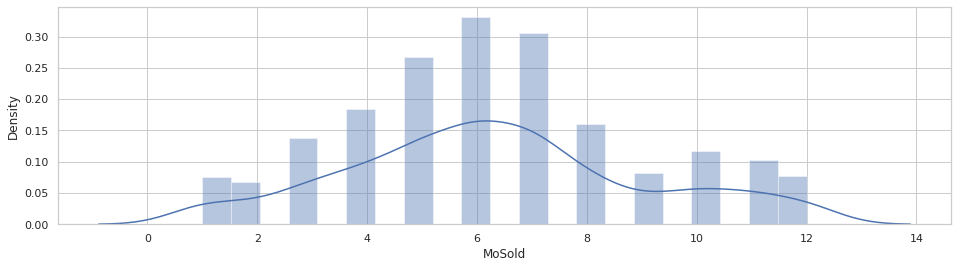

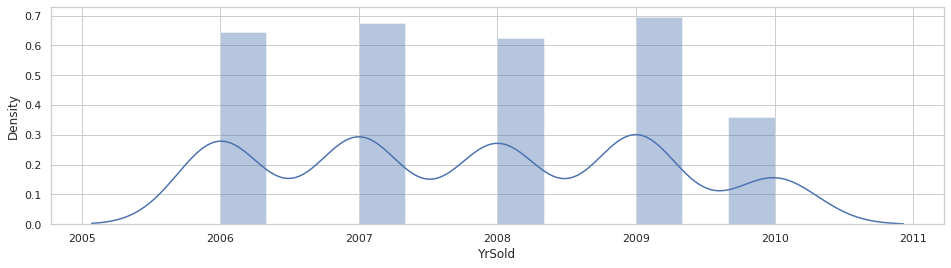

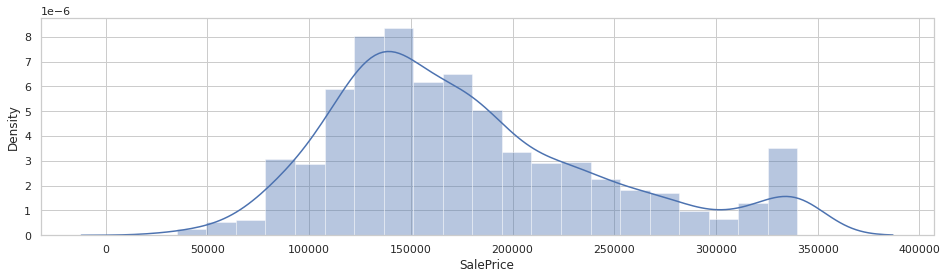

In [351]:
for column in numcol:
    plt.figure(figsize=(16, 4))
    sns.set_theme(style="whitegrid")
    print(column)
    sns.distplot(df[column])

In [130]:
df.drop('BsmtFinSF2',axis=1,inplace=True)

In [131]:
log=['BsmtUnfSF','LotFrontage','2ndFlrSF','GarageArea','MasVnrArea','BsmtFinSF1','BedroomAbvGr','Fireplaces','GarageCars','WoodDeckSF','OpenPorchSF']

In [132]:
# applying log transformation in order to remove skewness

for i in log:
  df[i]=np.log(df[i])

In [133]:
temp=[]
for i in log:
  temp.append(list(df[i].unique()))

In [134]:
for i in range(len(log)):
  if -np.inf in temp[i]:
    temp[i].remove(-np.inf)

In [135]:
k=0
for i in log:
  for j in range(len(df[i])):
    if (df[i][j]==-np.inf or df[i][j]==np.inf):
      df[i][j]=min(temp[k])
  k=k+1

In [136]:
pd.DataFrame(df.isnull().sum())

0
MSSubClass     0
MSZoning       0
LotFrontage    0
LotArea        0
Street         0
...           ..
MoSold         0
YrSold         0
SaleType       0
SaleCondition  0
SalePrice      0

[75 rows x 1 columns]

BsmtUnfSF
2ndFlrSF
LotArea
MasVnrArea
BsmtFinSF1
BedroomAbvGr
Fireplaces
GarageCars
WoodDeckSF
OpenPorchSF


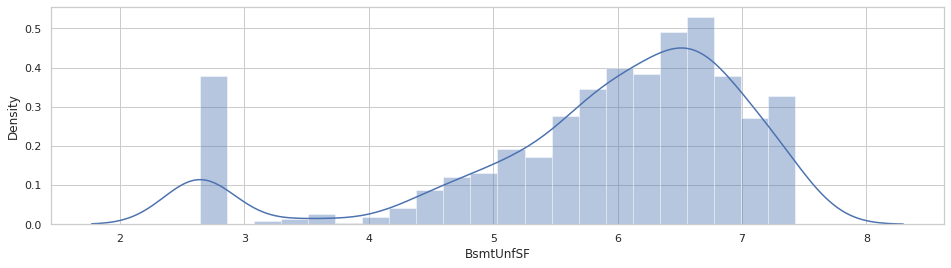

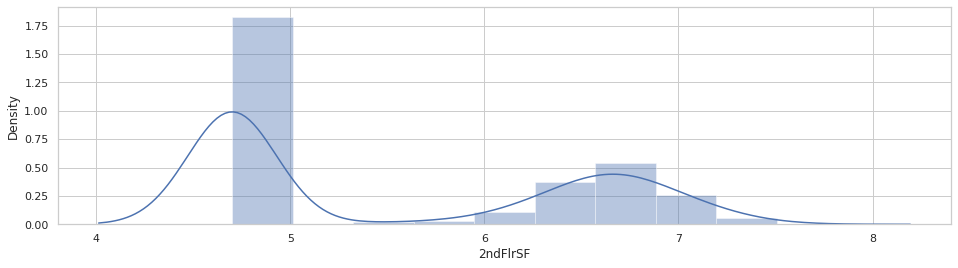

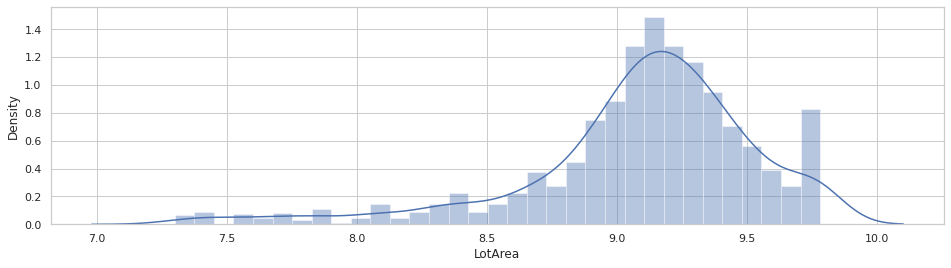

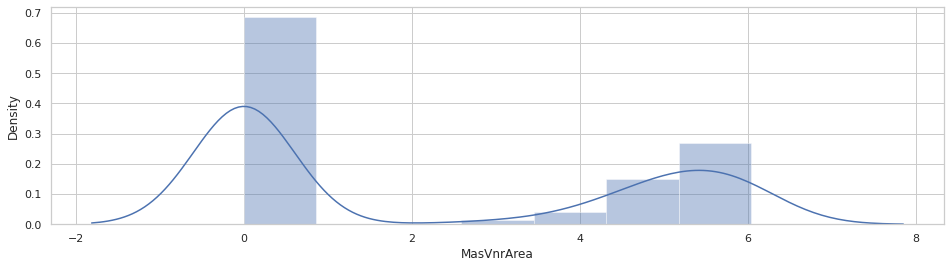

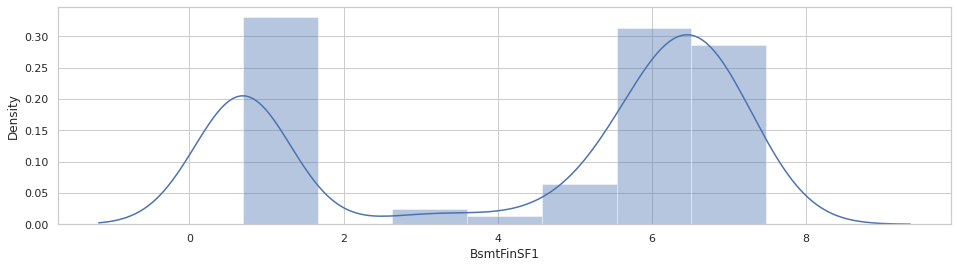

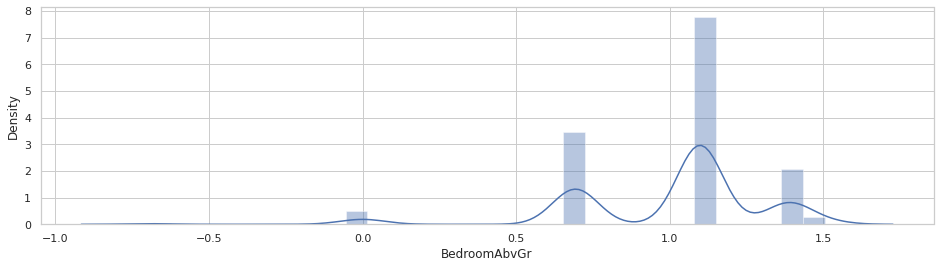

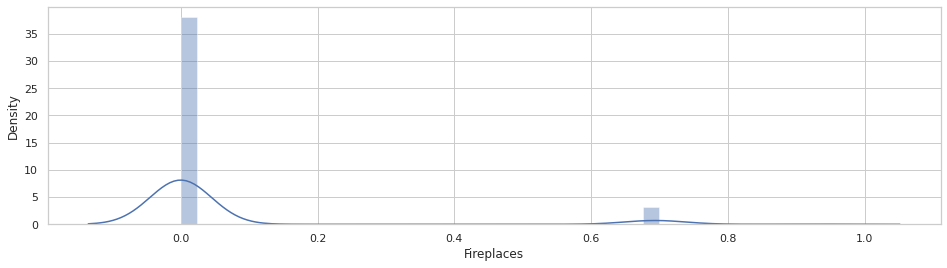

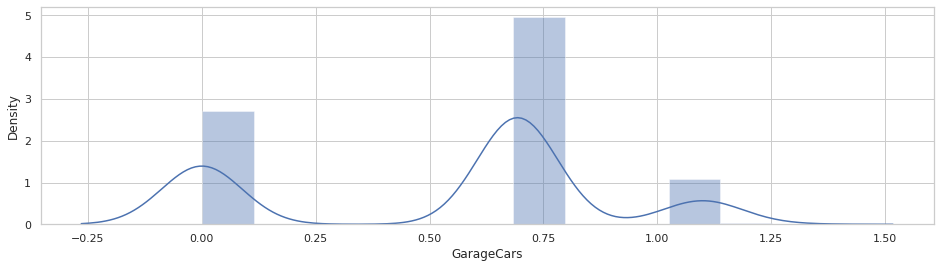

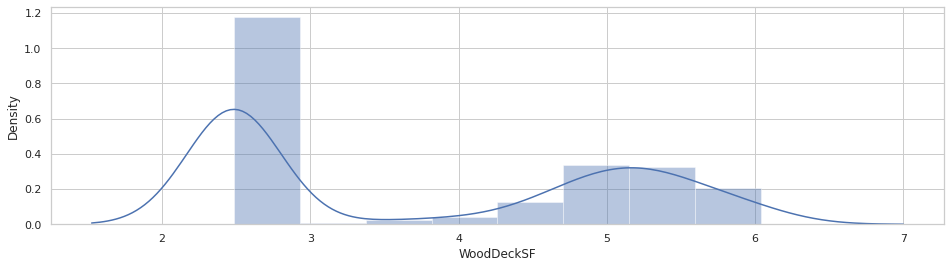

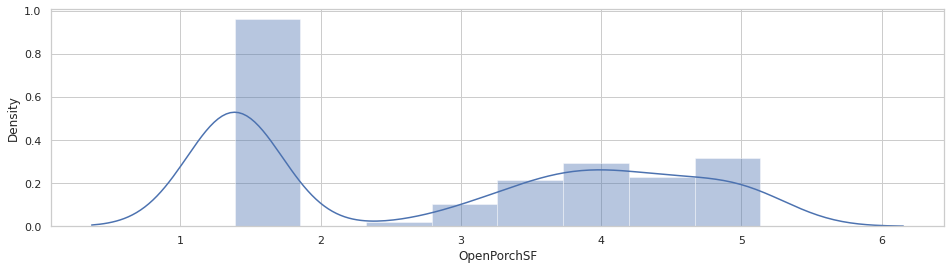

In [359]:
for column in log:
    plt.figure(figsize=(16, 4))
    sns.set_theme(style="whitegrid")
    print(column)
    sns.distplot(df[column])

In [424]:
df.drop('BsmtFinSF2',axis=1,inplace=True)

In [148]:
df.drop('Fireplaces',axis=1,inplace=True)

In [149]:
df.shape

(1460, 68)

In [ ]:
df.to_csv('house_train_proper.csv')

In [150]:
X=df.drop('SalePrice',axis=1)
y=df['SalePrice']

In [151]:
# Hyperparameter tuning
import numpy as np
from sklearn.model_selection import RandomizedSearchCV


In [152]:
from sklearn.model_selection import KFold
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [153]:
df_test=pd.read_csv('/content/drive/MyDrive/house_test_proper.csv')
df_test_id=pd.read_csv('/content/drive/MyDrive/house_test4.csv')

In [165]:
df_test.drop('Unnamed: 0',axis=1,inplace=True)

In [154]:
df_test.drop('Fireplaces',axis=1,inplace=True)

In [155]:
X=df.drop('SalePrice',axis=1)
y=df['SalePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [169]:
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print('Regression model accuracy : ')
regressor.score(X_test, y_test)

Regression model accuracy : 


0.85650605953414

In [170]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold_validation=KFold(n_splits=10)
results=cross_val_score(regressor,X,y,cv=kfold_validation)
print(results)
print('Cross validation score :')
print(np.mean(results))

[0.87842238 0.89696326 0.91814758 0.85854282 0.87008968 0.9104202
 0.89768603 0.90365333 0.80922603 0.87594123]
Cross validation score :
0.8819092555479067


In [158]:
# Hyperparameter tuning in order get the best parameter

import numpy as np
from sklearn.model_selection import RandomizedSearchCV
hyperparameter_grid = {
    'model__n_estimators': [50,70,90,100,130, 400, 800],
    'model__max_depth': [3,4,5, 6, 9],
    'model__learning_rate': [0.05, 0.1, 0.20],
    }
print(hyperparameter_grid)


{'model__n_estimators': [50, 70, 90, 100, 130, 400, 800], 'model__max_depth': [3, 4, 5, 6, 9], 'model__learning_rate': [0.05, 0.1, 0.2]}


In [159]:
# XgBoost algorithm

import xgboost
xgb_reg = xgboost.XGBRegressor()
xg_randomcv=RandomizedSearchCV(estimator=xgb_reg,param_distributions=hyperparameter_grid,n_iter=70,cv=cv,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
xg_randomcv.fit(X,y)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[18:59:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=XGBRegressor(), n_iter=70, n_jobs=-1,
                   param_distributions={'model__learning_rate': [0.05, 0.1,
                                                                 0.2],
                                        'model__max_depth': [3, 4, 5, 6, 9],
                                        'model__n_estimators': [50, 70, 90, 100,
                                                                130, 400,
                                                                800]},
                   random_state=100, verbose=2)

In [160]:
xg_randomcv.best_params_

{'model__learning_rate': 0.1,
 'model__max_depth': 3,
 'model__n_estimators': 800}

In [161]:
best_random_grid=xg_randomcv.best_estimator_

In [162]:
best_random_grid

XGBRegressor(model__learning_rate=0.1, model__max_depth=3,
             model__n_estimators=800)

In [166]:
y_pred=best_random_grid.predict(df_test)

In [174]:
#prediction

print(y_pred)

[122060.66  163150.33  188511.6   ... 166891.77  120006.914 225153.11 ]


In [168]:
output = pd.DataFrame({'Id': df_test_id['Id'],
                      'SalePrice': y_pred})
output.to_csv('submission20.csv', index=False)